In [1]:
"""
Purpose: To compare the different distances of presyn coordinates
between the auto distribution and the manual distribution


"""

'\nPurpose: To compare the different distances of presyn coordinates\nbetween the auto distribution and the manual distribution\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")

In [4]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-03-04 06:23:59,765 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:23:59,768 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:23:59,770 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:23:59,775 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-03-04 06:23:59,777 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:23:59,793 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-03-04 06:24:00,167 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,171 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,173 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,174 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:24:00,175 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,176 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,177 - settings - Setting database.password to newceliipass
INFO - 2021-03-04 06:24:00,180 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,632 - settings - Setting enable_python_native_blobs to True
INFO - 2021-03-04 06:24:00,672 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-03-04 06:24:00,674 - settings - Setting database.user to celiib
INFO - 2021-03-04 06:24:00,675 - settings - Setting database.pa

In [5]:
from pathlib import Path
import numpy as np
import neuron_visualizations as nviz
import datajoint as dj

import proofreading_utils as pru
import classification_utils as clu

import neuron_utils as nru
import validation_utils as vu
import pandas as pd

In [6]:
import validation_utils as vu

# Getting the Distribution of the Presyn from the Auto Distribution

In [ ]:
minnie.Auto

In [8]:
auto_presyns = minnie.AutoProofreadSynapse3() & "skeletal_distance_to_soma>0" & "synapse_type='presyn'"
auto_presyns - 

synapse_id synapse index within the segmentation,synapse_type,ver the version number of the materializaiton,segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
903966,presyn,30.00,864691135939649958,0,29831,1.56
904217,presyn,30.00,864691135939649958,0,29831,6.57
974603,presyn,30.00,864691135644599023,0,30448,5.13
1072759,presyn,30.00,864691135385316693,0,30104,161.27
1083421,presyn,30.00,864691135837208211,0,26424,98.74
1126224,presyn,30.00,864691135939649958,0,29831,14.75
1194858,presyn,30.00,864691135122295079,0,29845,87.36
1194912,presyn,30.00,864691135122295079,0,29845,87.56
1794183,presyn,30.00,864691135373405128,0,33523,5.59
1815674,presyn,30.00,864691135385284693,0,0,3.3


In [113]:
synapses_without_manual_proofread = auto_presyns - (du.m65mat.ProofreadFunctionalCoregV2 & 'ver=30')
synapses_without_manual_proofread

synapse_id synapse index within the segmentation,synapse_type,ver the version number of the materializaiton,segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
903966,presyn,30.00,864691135939649958,0,29831,1.56
904217,presyn,30.00,864691135939649958,0,29831,6.57
974603,presyn,30.00,864691135644599023,0,30448,5.13
1072759,presyn,30.00,864691135385316693,0,30104,161.27
1083421,presyn,30.00,864691135837208211,0,26424,98.74
1126224,presyn,30.00,864691135939649958,0,29831,14.75
1194858,presyn,30.00,864691135122295079,0,29845,87.36
1194912,presyn,30.00,864691135122295079,0,29845,87.56
1794183,presyn,30.00,864691135373405128,0,33523,5.59
1815674,presyn,30.00,864691135385284693,0,0,3.3


In [114]:
auto_synapse_complete = du.synapse_table() * synapses_without_manual_proofread
auto_synapse_complete

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,synapse_type,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40),segment_id segment_id of the cell. Equivalent to Allen 'pt_root_id,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma)
30.00,903966,864691135939649958,864691135122295079,presyn,69752,153510,20158,488,864691135939649958,0,29831,1.56
30.00,904217,864691135939649958,864691135850416327,presyn,70092,153630,20040,27132,864691135939649958,0,29831,6.57
30.00,974603,864691135644599023,864691135303187623,presyn,71684,155702,21455,4440,864691135644599023,0,30448,5.13
30.00,1072759,864691135385316693,864691135366598130,presyn,71738,188960,20249,3356,864691135385316693,0,30104,161.27
30.00,1083421,864691135837208211,864691135850416327,presyn,70276,143192,20292,20800,864691135837208211,0,26424,98.74
30.00,1126224,864691135939649958,864691135122295079,presyn,69590,152392,19900,7888,864691135939649958,0,29831,14.75
30.00,1194858,864691135122295079,864691135291730358,presyn,72833,173814,20060,6248,864691135122295079,0,29845,87.36
30.00,1194912,864691135122295079,864691136108738488,presyn,72866,173854,20070,4396,864691135122295079,0,29845,87.56
30.00,1794183,864691135373405128,864691135181753090,presyn,76628,171490,21117,6496,864691135373405128,0,33523,5.59
30.00,1815674,864691135385284693,864691135945495076,presyn,75490,121018,20081,248,864691135385284693,0,0,3.3


In [115]:
neuron_centers = minnie.AutoProofreadNeurons3().proj("soma_x","soma_y","soma_z")
neuron_centers

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
864691134219060901,0,0.25,30.00,0,0,0,3,84299,173386,16102
864691134221889045,0,0.25,30.00,5,0,0,3,320238,210586,26743
864691134242673681,0,0.25,30.00,0,0,0,3,234412,136554,27737
864691134252908410,0,0.25,30.00,0,0,0,3,402642,157170,23838
864691134316523453,0,0.25,30.00,0,0,0,3,87049,293153,20713
864691134384033872,0,0.25,30.00,0,0,0,3,235461,161353,25062
864691134391593458,0,0.25,30.00,0,0,0,3,128496,153286,25750
864691134409056935,0,0.25,30.00,0,0,0,3,214397,218066,26414
864691134428609977,0,0.25,30.00,0,0,0,3,100208,148674,17063
864691134441691943,0,0.25,30.00,0,0,0,3,128701,185075,22860


In [116]:
auto_synapse_complete_with_soma_centers = auto_synapse_complete * neuron_centers
auto_synapse_complete_with_soma_centers

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,synapse_type,segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40),nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,skeletal_distance_to_soma the length (in um) of skeleton distance from synapse to soma (-1 if on the soma),"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
30.00,903966,864691135939649958,864691135122295079,presyn,864691135939649958,0,0.25,1,0,0,3,69752,153510,20158,488,29831,1.56,68224,153410,20119
30.00,904217,864691135939649958,864691135850416327,presyn,864691135939649958,0,0.25,1,0,0,3,70092,153630,20040,27132,29831,6.57,68224,153410,20119
30.00,974603,864691135644599023,864691135303187623,presyn,864691135644599023,0,0.25,0,0,0,3,71684,155702,21455,4440,30448,5.13,72315,157738,21316
30.00,1072759,864691135385316693,864691135366598130,presyn,864691135385316693,0,0.25,0,0,0,3,71738,188960,20249,3356,30104,161.27,66042,149074,20316
30.00,1083421,864691135837208211,864691135850416327,presyn,864691135837208211,0,0.25,5,0,0,3,70276,143192,20292,20800,26424,98.74,72408,130148,19901
30.00,1126224,864691135939649958,864691135122295079,presyn,864691135939649958,0,0.25,1,0,0,3,69590,152392,19900,7888,29831,14.75,68224,153410,20119
30.00,1194858,864691135122295079,864691135291730358,presyn,864691135122295079,0,0.25,0,0,0,3,72833,173814,20060,6248,29845,87.36,69129,152004,20188
30.00,1194912,864691135122295079,864691136108738488,presyn,864691135122295079,0,0.25,0,0,0,3,72866,173854,20070,4396,29845,87.56,69129,152004,20188
30.00,1794183,864691135373405128,864691135181753090,presyn,864691135373405128,0,0.25,0,0,0,3,76628,171490,21117,6496,33523,5.59,77312,173002,20916
30.00,1815674,864691135385284693,864691135945495076,presyn,864691135385284693,0,0.25,0,0,0,3,75490,121018,20081,248,0,3.3,74681,119488,20020


In [117]:
# du.plot_proofread_neuron(864691135207831417,
#                          plot_errored_faces=True,
#                         plot_proofreading_synapses=True,
#                         plot_error_synapses=True,
                         
#                         plot_axon=True)

In [118]:
(presyn_list,
 segment_id_list,
 split_index_list,
 centroid_xs,
 centroid_ys,
 centroid_zs,
 skeletal_distance_to_soma_list,
soma_x,soma_y,soma_z) = auto_synapse_complete_with_soma_centers.fetch(
                            "presyn","segment_id","split_index",
                            "synapse_x","synapse_y","synapse_z",
                           "skeletal_distance_to_soma",
                            "soma_x","soma_y","soma_z")

In [119]:
np.where(np.array(presyn_list) != np.array(segment_id_list))[0].shape

(0,)

In [125]:
synapse_centroids = np.vstack([centroid_xs,centroid_ys,centroid_zs]).T * [4,4,40]
synapse_centroids.shape

(1898325, 3)

In [121]:
soma_centroids = np.vstack([soma_x,soma_y,soma_z]).T * [4,4,40]
soma_centroids

array([[ 272896,  613640,  804760],
       [ 272896,  613640,  804760],
       [ 289260,  630952,  852640],
       ...,
       [1448980,  934456,  698720],
       [1384996, 1033388,  921400],
       [ 899436, 1001968,  655680]])

# Computing and Plotting the Distances

In [122]:
# 2D Distance
distances_2D = np.linalg.norm(synapse_centroids[:,:2] - soma_centroids[:,:2],axis=1)/1000
distances_3D = np.linalg.norm(synapse_centroids - soma_centroids,axis=1)/1000
skeletal_distances = skeletal_distance_to_soma_list
skeletal_distances.shape

(1898325,)

In [123]:
import matplotlib.pyplot as plt

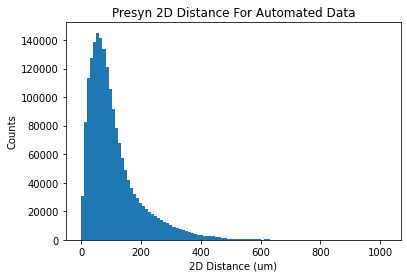

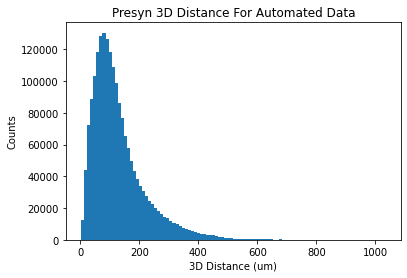

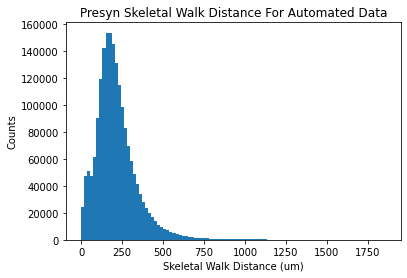

In [124]:
data_string = ["2D Distance","3D Distance","Skeletal Walk Distance"]
data = [distances_2D,distances_3D,skeletal_distances]
n_bins = 100

for d,ds in zip(data,data_string): 
    #d,ds = data[0],data_string[0]
    fig,ax = plt.subplots()
    ax.hist(d,bins=n_bins)
    ax.set_title(f"Presyn {ds} For Automated Data")
    ax.set_xlabel(f"{ds} (um)")
    ax.set_ylabel(f"Counts")
    plt.show()

    

# Getting the automated data

In [62]:
import proofreading_utils as pu

ver materialization version,synapse_id synapse index within the segmentation,presyn segment_id of the presynaptic cell. Equivalent to Allen 'pt_root_id'.,postsyn segment_id of the postsynaptic cell. Equivalent to Allen 'pt_root_id'.,"synapse_x x coordinate of synapse centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_y y coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.","synapse_z z coordinate of centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm). From Allen 'ctr_pt_position'.",synapse_size (EM voxels) scaled by (4x4x40)
30.00,10957,864691135087399350,864691135087399350,55164,103758,21202,20484
30.00,11021,864691135087399350,864691135087399350,55242,102912,21202,4780
30.00,11047,864691135087399350,864691135087399350,55336,102653,21202,3368
30.00,11065,864691135087399350,864691135087399350,55397,103990,21199,628
30.00,11075,864691135087399350,864691135087399350,55429,103423,21201,6292
30.00,11081,864691135087399350,864691135087399350,55444,103664,21203,2932
30.00,11203,864691135087399350,864691135087399350,55786,104910,21208,14656
30.00,11220,864691135087399350,864691135087399350,55778,102596,21203,2840
30.00,11240,864691135087399350,864691135087399350,56040,104665,21199,16628
30.00,11338,864691135087399350,864691135087399350,56036,101908,21200,264


# getting the synapses for one manual neuron

In [79]:
proofread_segments_with_center = (minnie.AutoProofreadValidationSegmentMap.proj(new_version="ver") *
                                  minnie.AutoProofreadNeurons3.proj("soma_x","soma_y","soma_z"))
proofread_segments_with_center

new_version materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,old_segment_id the segment id in the proofread version--,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)"
49.00,225498,864691135724333739,0.08,864691135564655959,0,0.25,30.00,5,0,0,3,149648,151631,17554
49.00,262773,864691136023889209,0.08,864691135233108569,0,0.25,30.00,5,0,0,3,168039,161890,21493
49.00,269247,864691135462463389,0.08,864691136105498585,0,0.25,30.00,5,0,0,3,177560,213859,19894
49.00,271518,864691136108768952,0.08,864691136333776819,0,0.25,30.00,5,0,0,3,168626,226043,21123
49.00,294545,864691135517422218,0.08,864691135771629819,0,0.25,30.00,5,0,0,3,183081,135786,21116
49.00,300763,864691136116205476,0.08,864691136105484249,0,0.25,30.00,5,0,0,3,182133,178301,20198
49.00,301095,864691135446675028,0.08,864691135212632448,0,0.25,30.00,5,0,0,3,185332,185160,21268
49.00,330079,864691135564752471,0.08,864691136311740477,0,0.25,30.00,5,0,0,3,204791,143894,19175
49.00,330326,864691136378815445,0.08,864691135491233631,0,0.25,30.00,5,0,0,3,206866,155362,20512
49.00,331945,864691135953898760,0.08,864691135945413668,0,0.25,30.00,5,0,0,3,198042,174696,16950


In [80]:
proofread_segment_ids,proof_sx,proof_sy,proof_sz = proofread_segments_with_center.fetch(
                                                    "segment_id","soma_x","soma_y","soma_z")
proofread_soma_centers = np.vstack([proof_sx,proof_sy,proof_sz]).T*[4,4,40]
proofread_soma_centers

array([[ 598592,  606524,  702160],
       [ 672156,  647560,  859720],
       [ 710240,  855436,  795760],
       [ 674504,  904172,  844920],
       [ 732324,  543144,  844640],
       [ 728532,  713204,  807920],
       [ 741328,  740640,  850720],
       [ 819164,  575576,  767000],
       [ 827464,  621448,  820480],
       [ 792168,  698784,  678000],
       [ 795676,  754760,  791560],
       [1101272,  640736,  953040],
       [1148300,  500400,  955000],
       [1162296,  541824, 1076960],
       [1167744,  678992,  891080],
       [1169768,  642004, 1029080],
       [1241416,  442844,  763760],
       [1196668,  492924,  919280],
       [1184212,  493284,  936680],
       [1213984,  572772,  878960],
       [1192324,  637144,  979040],
       [1188184,  674872,  953800],
       [1209312,  711036,  652440],
       [1303364,  548128,  775360],
       [1298844,  572148,  797760],
       [1296848,  522564,  829760],
       [1246040,  629716,  917480],
       [1283140,  621668, 10

In [103]:
proof_dict = dict()
verbose = True

In [85]:
curr_index = 0
segment_id = proofread_segment_ids[curr_index]
soma_center = proofread_soma_centers[curr_index]
split_index = 0

if verbose:
    print(f"Working on index {curr_index}: Neuron {segment_id}")
    print(f"soma_center = {soma_center}")

Working on index 0: Neuron 864691135724333739
soma_center = [598592 606524 702160]


In [66]:
# downloading the neuron
neuron_obj = (minnie.Decomposition() & dict(segment_id =segment_id,
                             split_index=split_index)).fetch1("decomposition")
neuron_obj

Decompressing Neuron in minimal output mode...please wait


In [69]:
# getting the synapses data and synapse centers
beginning_direct_connections = du.segment_id_to_synapse_table(segment_id,
                                                              synapse_type="presyn",
                                                            validation=False)
synapse_x,synapse_y,synapse_z = beginning_direct_connections.fetch("synapse_x","synapse_y","synapse_z")
val_syn_centers = np.vstack([synapse_x,synapse_y,synapse_z]).T*[4,4,40]
val_syn_centers

array([[419136, 604000, 942560],
       [422328, 577088, 875760],
       [430200, 675320, 820440],
       ...,
       [949512, 734656, 809200],
       [952400, 741752, 810320],
       [955896, 747144, 812840]])

In [71]:
# getting the skeletal walk distance
syn_dist = nru.synapse_skeletal_distances_to_soma(neuron_obj=neuron_obj,
                                               synapse_coordinates=val_syn_centers,
                                               verbose = True,

                                              )

Having ot generate KDTree from scratch
Synapse 1 distance: 603.3479153113825
Synapse 2 distance: 485.56444198299727
Synapse 3 distance: 485.16445673272733
Synapse 4 distance: 471.16668656748334
Synapse 7 distance: 584.7493307622749
Synapse 8 distance: 421.66808835264123
Synapse 9 distance: 575.5100015738973
Synapse 10 distance: 564.5108525863405
Synapse 11 distance: 461.08956955974674
Synapse 12 distance: 463.88938555109394
Synapse 13 distance: 480.8876450077124
Synapse 14 distance: 476.78797413450974
Synapse 15 distance: 485.387370936519
Synapse 16 distance: 517.1838831485617
Synapse 17 distance: 518.4837456128878
Synapse 18 distance: 442.6659707735603
Synapse 19 distance: 447.4656862734744
Synapse 20 distance: 527.5824243192504
Synapse 21 distance: 491.2864388686336
Synapse 22 distance: 495.2858390933173
Synapse 23 distance: 410.86855670926735
Synapse 27 distance: 385.07117654964617
Synapse 28 distance: 323.8947439203201
Synapse 29 distance: 311.59672567563894
Synapse 30 distance: 30

Synapse 320 distance: 161.2680383341465
Synapse 321 distance: 162.66682965546622
Synapse 322 distance: 174.9656376347131
Synapse 325 distance: 233.19554635484099
Synapse 326 distance: 222.19681196342592
Synapse 327 distance: 197.4881384914614
Synapse 328 distance: 200.18806829305979
Synapse 329 distance: 204.7880014260081
Synapse 330 distance: 252.12511966492235
Synapse 331 distance: 256.42492151920993
Synapse 332 distance: 258.02487303224694
Synapse 333 distance: 320.64849180804384
Synapse 334 distance: 227.80922098502535
Synapse 335 distance: 304.8589264107534
Synapse 336 distance: 310.5586546935334
Synapse 337 distance: 313.75848354671905
Synapse 339 distance: 226.8843671601899
Synapse 340 distance: 231.08423340163662
Synapse 341 distance: 245.80630802773427
Synapse 342 distance: 253.70588847505883
Synapse 343 distance: 268.62432717822105
Synapse 344 distance: 270.22422556646563
Synapse 345 distance: 272.7239220864957
Synapse 346 distance: 266.2243436931325
Synapse 347 distance: 187

In [107]:
idx_to_keep = np.where(syn_dist >0)[0]

curr_distances_2D = np.linalg.norm(val_syn_centers[:,:2] - soma_center[:2],axis=1)/1000
curr_distances_2D = curr_distances_2D[idx_to_keep]

curr_distances_3D = np.linalg.norm(val_syn_centers - soma_center,axis=1)/1000
curr_distances_3D = curr_distances_3D[idx_to_keep]


curr_skeletal_distances = syn_dist[idx_to_keep]

proof_dict[segment_id] = dict(distances_2D =curr_distances_2D,
                             distances_3D=curr_distances_3D,
                             skeletal_distances=curr_skeletal_distances)

if verbose:
    print(f"For Segment_id = {segment_id}: 3D, 2D and skeletal mean = {np.mean(curr_distances_3D),np.mean(curr_distances_2D),np.mean(curr_skeletal_distances)}")

proof_dict

For Segment_id = 864691135724333739: 3D, 2D and skeletal mean = (182.7665574180584, 142.91931746337252, 308.07939405119964)


{864691135724333739: {'distances_2D': array([178.70499655, 181.90314808, 181.71016082, 174.32645353,
         165.533047  , 158.11784896, 158.06206745, 150.69319215,
         156.22017985, 154.66524621, 151.13935742, 150.94310308,
         148.79069143, 147.22673431, 146.26482749, 163.76094172,
         161.38899318, 145.62395325, 146.91367092, 144.47023693,
         150.58255649, 137.80118995, 118.41014457, 108.79923654,
         104.31053554, 101.08533908, 100.5294516 ,  92.13193774,
         154.59756278,  84.22685985, 153.47562569, 151.15952183,
         130.59454868, 127.23579654, 125.69767928,  81.8212523 ,
          71.39170562,  64.57902384,  61.57677341, 126.5338674 ,
          77.91871755,  58.67241737,  50.72917157,  74.26027449,
         139.76253604, 137.07350647, 136.29966075, 135.03225061,
          72.59773231,  45.37807488,  65.66774612,  47.63031253,
          49.25184082,  51.17754586, 128.77046773, 126.98327506,
         130.10007674, 124.25396966, 119.85301645,  58

In [ ]:
"""
Plotting the distribution of the synapses 


"""

# Running All of the proofread synapses through proessing pipeline

In [128]:
proof_dict[proofread_segment_ids[1]]

{'distances_2D': array([139.89944143, 122.55991155, 135.09688737, 125.99199244,
        130.86036093, 129.94      , 134.58767973, 122.10091859,
        129.63829983, 132.90549286, 130.37099659, 139.46855984,
        138.04787512, 135.66901801, 120.14693651, 120.20255738,
        119.59539857, 123.80768635, 115.79162837, 114.42336887,
        114.4560037 , 168.66762222, 220.74126962, 209.6974525 ,
        200.43525778, 108.02476109, 104.82554048, 161.35030496,
         88.94876413,  84.16371028,  90.38247945,  89.85533484,
         94.7027252 , 102.63508804, 101.25243179, 100.8420475 ,
         88.00745687,  85.74043518, 154.15659721, 153.80894856,
         65.48176528,  73.40467397, 131.85703682,  77.01900534,
         68.22362019,  62.9530066 ,  53.9855188 , 110.3947606 ,
         99.03316172,  73.07814568,  73.56897748,  32.53314765,
         28.62936926,  83.67579158,  79.85060701,  50.18201447,
         98.46894698,  88.77717698,  66.72713259,  88.30198412,
         86.26637676,  9

In [109]:
proof_dict = dict()
verbose = True

for curr_index in range(len(proofread_segment_ids)):
    segment_id = proofread_segment_ids[curr_index]
    soma_center = proofread_soma_centers[curr_index]
    split_index = 0

    if verbose:
        print(f"Working on index {curr_index}: Neuron {segment_id}")
        print(f"soma_center = {soma_center}")
        
    # downloading the neuron
    neuron_obj = (minnie.Decomposition() & dict(segment_id =segment_id,
                                 split_index=split_index)).fetch1("decomposition")

    # getting the synapses data and synapse centers
    beginning_direct_connections = du.segment_id_to_synapse_table(segment_id,
                                                                  synapse_type="presyn",
                                                                validation=False)
    synapse_x,synapse_y,synapse_z = beginning_direct_connections.fetch("synapse_x","synapse_y","synapse_z")
    val_syn_centers = np.vstack([synapse_x,synapse_y,synapse_z]).T*[4,4,40]

    if verbose:
        print(f"Number of synapse = {len(val_syn_centers)}")


    # getting the skeletal walk distance
    syn_dist = nru.synapse_skeletal_distances_to_soma(neuron_obj=neuron_obj,
                                                   synapse_coordinates=val_syn_centers,
                                                   verbose = True,

                                                  )

    idx_to_keep = np.where(syn_dist >0)[0]

    curr_distances_2D = np.linalg.norm(val_syn_centers[:,:2] - soma_center[:2],axis=1)/1000
    curr_distances_2D = curr_distances_2D[idx_to_keep]

    curr_distances_3D = np.linalg.norm(val_syn_centers - soma_center,axis=1)/1000
    curr_distances_3D = curr_distances_3D[idx_to_keep]


    curr_skeletal_distances = syn_dist[idx_to_keep]

    proof_dict[segment_id] = dict(distances_2D =curr_distances_2D,
                                 distances_3D=curr_distances_3D,
                                 skeletal_distances=curr_skeletal_distances)

    if verbose:
        print(f"For Segment_id = {segment_id}: 3D, 2D and skeletal mean = {np.mean(curr_distances_3D),np.mean(curr_distances_2D),np.mean(curr_skeletal_distances)}")



Working on index 0: Neuron 864691135724333739
soma_center = [598592 606524 702160]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 523
Having ot generate KDTree from scratch
Synapse 1 distance: 603.3479153113825
Synapse 2 distance: 485.56444198299727
Synapse 3 distance: 485.16445673272733
Synapse 4 distance: 471.16668656748334
Synapse 7 distance: 584.7493307622749
Synapse 8 distance: 421.66808835264123
Synapse 9 distance: 575.5100015738973
Synapse 10 distance: 564.5108525863405
Synapse 11 distance: 461.08956955974674
Synapse 12 distance: 463.88938555109394
Synapse 13 distance: 480.8876450077124
Synapse 14 distance: 476.78797413450974
Synapse 15 distance: 485.387370936519
Synapse 16 distance: 517.1838831485617
Synapse 17 distance: 518.4837456128878
Synapse 18 distance: 442.6659707735603
Synapse 19 distance: 447.4656862734744
Synapse 20 distance: 527.5824243192504
Synapse 21 distance: 491.2864388686336
Synapse 22 distance: 495.2858390933173
Synapse 23 distan

Synapse 315 distance: 236.8274868227698
Synapse 316 distance: 240.92576972596547
Synapse 317 distance: 214.69901092666043
Synapse 318 distance: 216.59831986002715
Synapse 319 distance: 216.50993280201905
Synapse 320 distance: 161.2680383341465
Synapse 321 distance: 162.66682965546622
Synapse 322 distance: 174.9656376347131
Synapse 325 distance: 233.19554635484099
Synapse 326 distance: 222.19681196342592
Synapse 327 distance: 197.4881384914614
Synapse 328 distance: 200.18806829305979
Synapse 329 distance: 204.7880014260081
Synapse 330 distance: 252.12511966492235
Synapse 331 distance: 256.42492151920993
Synapse 332 distance: 258.02487303224694
Synapse 333 distance: 320.64849180804384
Synapse 334 distance: 227.80922098502535
Synapse 335 distance: 304.8589264107534
Synapse 336 distance: 310.5586546935334
Synapse 337 distance: 313.75848354671905
Synapse 339 distance: 226.8843671601899
Synapse 340 distance: 231.08423340163662
Synapse 341 distance: 245.80630802773427
Synapse 342 distance: 25

Synapse 102 distance: 193.65865588705512
Synapse 103 distance: 190.65907457090336
Synapse 104 distance: 148.0618035952914
Synapse 105 distance: 142.66216726205587
Synapse 106 distance: 200.7821741687862
Synapse 107 distance: 200.38217718984345
Synapse 120 distance: 110.6215240667376
Synapse 127 distance: 126.76369048565607
Synapse 128 distance: 172.68590371155665
Synapse 129 distance: 125.4205998929456
Synapse 143 distance: 86.63300115502403
Synapse 144 distance: 106.54306118041552
Synapse 145 distance: 90.16330968897503
Synapse 146 distance: 141.94959583814608
Synapse 147 distance: 129.85063255921827
Synapse 151 distance: 734.997622619662
Synapse 152 distance: 732.2977209347741
Synapse 153 distance: 796.2229021375753
Synapse 154 distance: 803.5224757124131
Synapse 161 distance: 714.5992690036354
Synapse 162 distance: 721.6986809901982
Synapse 163 distance: 79.66359295134592
Synapse 164 distance: 681.303722285799
Synapse 165 distance: 705.1000094061704
Synapse 166 distance: 743.6963027

Synapse 500 distance: 150.24681280534787
Synapse 513 distance: 156.81111511593386
Synapse 514 distance: 184.8038888131865
Synapse 515 distance: 260.9139223207156
Synapse 516 distance: 201.5028514674058
Synapse 517 distance: 201.10286194635998
Synapse 520 distance: 181.20427500154318
Synapse 521 distance: 175.64088914751983
Synapse 522 distance: 177.24083797927767
Synapse 523 distance: 168.80613024843277
Synapse 524 distance: 168.40613053970165
Synapse 525 distance: 154.94084988870443
Synapse 526 distance: 164.73997227066945
Synapse 527 distance: 162.14605548686365
Synapse 529 distance: 193.50082470041815
Synapse 530 distance: 195.50079689832359
Synapse 531 distance: 204.69972727546997
Synapse 532 distance: 206.6995826756797
Synapse 533 distance: 180.8441182515182
Synapse 534 distance: 184.7438484492705
Synapse 535 distance: 184.7438484492705
Synapse 536 distance: 289.5120495128389
Synapse 537 distance: 238.19967541299837
Synapse 538 distance: 218.80066102630124
Synapse 539 distance: 22

Synapse 725 distance: 819.5863414427067
Synapse 726 distance: 819.7863414427069
Synapse 727 distance: 821.3861911654287
Synapse 728 distance: 823.9859878091501
Synapse 729 distance: 919.6783000232571
Synapse 730 distance: 867.6812250271536
Synapse 731 distance: 855.0821039113496
Synapse 732 distance: 826.5708421286025
Synapse 733 distance: 826.4708421286024
Synapse 734 distance: 833.4702982223454
Synapse 735 distance: 888.6802732104034
Synapse 736 distance: 834.884009295036
Synapse 737 distance: 921.8781789392835
Synapse 738 distance: 910.478851335097
Synapse 739 distance: 847.7765388965413
Synapse 740 distance: 864.8535298767624
Synapse 741 distance: 880.2595254988832
Synapse 742 distance: 883.3594507048127
Synapse 743 distance: 993.3382116828967
Synapse 744 distance: 994.7380826463855
Synapse 745 distance: 952.7535779571599
Synapse 746 distance: 968.3500943243408
Synapse 747 distance: 967.6501969967344
Synapse 749 distance: 934.1558840520637
Synapse 750 distance: 907.9569743736412
Sy

Synapse 364 distance: 423.61216454842594
Synapse 365 distance: 423.01226753774404
Synapse 366 distance: 414.31261288237175
Synapse 368 distance: 351.1150641148225
Synapse 369 distance: 399.0129239134899
Synapse 370 distance: 342.31545662756866
Synapse 371 distance: 292.30386039808604
Synapse 372 distance: 292.2039151814272
Synapse 373 distance: 278.31269369821575
Synapse 374 distance: 277.91277971521396
Synapse 375 distance: 269.6131370851775
Synapse 376 distance: 170.8453055837693
Synapse 377 distance: 173.14521042880506
Synapse 378 distance: 180.14460262199458
Synapse 379 distance: 297.3109663608702
Synapse 381 distance: 153.94091656537458
Synapse 382 distance: 152.7409216605955
Synapse 383 distance: 81.47596158778295
Synapse 384 distance: 233.80462986092
Synapse 386 distance: 170.86262926631642
Synapse 388 distance: 266.97781174760695
Synapse 389 distance: 234.21535997392013
Synapse 393 distance: 293.61105843873816
Synapse 394 distance: 185.14438095798434
Synapse 395 distance: 186.0

Synapse 605 distance: 206.60771852720256
Synapse 606 distance: 213.1060719443217
Synapse 607 distance: 203.80805099312903
Synapse 608 distance: 205.81205852510237
Synapse 609 distance: 203.9122609120414
Synapse 611 distance: 345.06235468162663
Synapse 612 distance: 261.18309950426453
Synapse 613 distance: 220.5103166838788
Synapse 614 distance: 220.71027761422124
Synapse 615 distance: 238.43076820886432
Synapse 616 distance: 213.0253844117055
Synapse 620 distance: 281.18181555402305
Synapse 621 distance: 284.7813544213947
Synapse 622 distance: 185.7781002988678
Synapse 623 distance: 191.5775448718953
Synapse 624 distance: 221.21024538318062
Synapse 625 distance: 183.70455476400562
Synapse 626 distance: 174.1686101899503
Synapse 627 distance: 174.33442405000162
Synapse 628 distance: 175.87922017602534
Synapse 629 distance: 195.62730648304802
Synapse 630 distance: 238.33076820886438
Synapse 631 distance: 312.7345676638041
Synapse 632 distance: 297.2807803602468
Synapse 633 distance: 322.

Synapse 108 distance: 118.83576501196077
Synapse 109 distance: 91.8523941829649
Synapse 110 distance: 98.25190450083679
Synapse 111 distance: 80.2395959802196
Synapse 112 distance: 88.50680829914342
Synapse 113 distance: 80.69209150834794
Synapse 114 distance: 97.83823672505632
Synapse 115 distance: 134.09807628345172
Synapse 116 distance: 250.7508941623018
Synapse 118 distance: 110.70040533985345
Synapse 120 distance: 256.6066727159312
Synapse 121 distance: 89.2216086222382
Synapse 122 distance: 89.1025200970283
Synapse 123 distance: 112.644896068244
Synapse 124 distance: 79.8221264351396
Synapse 125 distance: 103.74555348838975
Synapse 126 distance: 263.0050412133862
Synapse 127 distance: 267.3045705208641
Synapse 128 distance: 268.7045331989033
Synapse 129 distance: 54.51474833785971
Synapse 130 distance: 273.2501136999302
Synapse 132 distance: 245.6512009365273
Synapse 133 distance: 295.1027050797355
Synapse 134 distance: 281.0034594234271
Synapse 135 distance: 98.59835858965803
Sy

Synapse 202 distance: 131.3734816079434
Synapse 203 distance: 366.32096316778274
Synapse 204 distance: 622.2282754753462
Synapse 205 distance: 300.7915073127248
Synapse 208 distance: 226.12788433948663
Synapse 209 distance: 299.62634017725117
Synapse 210 distance: 344.02411749225286
Synapse 211 distance: 350.7224615390399
Synapse 212 distance: 350.7224615390399
Synapse 213 distance: 274.2430787679276
Synapse 214 distance: 270.94337579105274
Synapse 215 distance: 307.22603063643413
Synapse 216 distance: 564.9327893687243
Synapse 217 distance: 565.0327881310906
Synapse 218 distance: 586.4311229786549
Synapse 219 distance: 595.3307105656272
Synapse 220 distance: 586.3311229786548
Synapse 221 distance: 587.830888914441
Synapse 222 distance: 251.09718702059274
Synapse 223 distance: 265.5946449620577
Synapse 224 distance: 334.025607623401
Synapse 225 distance: 123.97372751970545
Synapse 226 distance: 112.27763337021781
Synapse 227 distance: 537.7345853887077
Synapse 228 distance: 536.6346378

Synapse 443 distance: 448.53819822101764
Synapse 448 distance: 376.69053892129364
Synapse 449 distance: 377.4904900264871
Synapse 450 distance: 385.9897966208916
Synapse 451 distance: 321.6854469904501
Synapse 452 distance: 290.71307853127905
Synapse 453 distance: 290.7039226264842
Synapse 454 distance: 298.35771744595036
Synapse 455 distance: 297.4582480950299
Synapse 456 distance: 295.6583058302345
Synapse 457 distance: 285.9898464836313
Synapse 460 distance: 404.1185909678428
Synapse 461 distance: 347.2821135966884
Synapse 462 distance: 348.8818688295452
Synapse 463 distance: 340.5253783713995
Synapse 464 distance: 346.02532572581515
Synapse 465 distance: 350.62502889831154
Synapse 466 distance: 113.00089901997009
Synapse 467 distance: 263.00661302533746
Synapse 468 distance: 352.24902516518915
Synapse 469 distance: 148.91068169677692
Synapse 470 distance: 160.2102237071404
Synapse 471 distance: 164.80957514042473
Synapse 472 distance: 313.08591321519384
Synapse 473 distance: 267.00

Synapse 697 distance: 678.3018827451623
Synapse 698 distance: 686.3008795239609
Synapse 699 distance: 702.0999895751942
Synapse 700 distance: 706.0997626811617
Synapse 701 distance: 743.3932048507089
Synapse 702 distance: 767.0908823232775
Synapse 703 distance: 773.9904105035997
For Segment_id = 864691135517422218: 3D, 2D and skeletal mean = (250.0900755787572, 227.87615639541062, 371.9234612946464)
Working on index 5: Neuron 864691136116205476
soma_center = [728532 713204 807920]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 217
Having ot generate KDTree from scratch
Synapse 0 distance: 358.0450128777864
Synapse 1 distance: 363.94359620729284
Synapse 2 distance: 365.443467809025
Synapse 3 distance: 355.14553319106983
Synapse 4 distance: 343.3479530686582
Synapse 5 distance: 346.34698575228595
Synapse 6 distance: 335.84881870691936
Synapse 7 distance: 371.54132043006587
Synapse 8 distance: 375.84056853878707
Synapse 9 distance: 377.0405038997347
Synapse 

Synapse 211 distance: 208.98412314567008
Synapse 212 distance: 174.43925138002078
Synapse 213 distance: 227.87977207264518
Synapse 214 distance: 171.13942224867154
Synapse 215 distance: 215.78569097035714
Synapse 216 distance: 219.38550140383322
For Segment_id = 864691136116205476: 3D, 2D and skeletal mean = (123.59675920524208, 102.4524838713885, 282.9531221444727)
Working on index 6: Neuron 864691135446675028
soma_center = [741328 740640 850720]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 295
Having ot generate KDTree from scratch
Synapse 0 distance: 457.9545015073544
Synapse 1 distance: 475.527817318945
Synapse 2 distance: 475.727817318945
Synapse 3 distance: 430.558535857921
Synapse 4 distance: 426.6591322518019
Synapse 5 distance: 410.4603632997504
Synapse 6 distance: 410.0604101168987
Synapse 7 distance: 410.4603632997504
Synapse 8 distance: 385.36578845999605
Synapse 9 distance: 350.0704001286313
Synapse 10 distance: 366.0682959690336
Synapse 11

Synapse 252 distance: 250.346411680378
Synapse 253 distance: 251.34624573981182
Synapse 254 distance: 257.54504156955346
Synapse 255 distance: 257.32624364531216
Synapse 256 distance: 277.6429267666457
Synapse 259 distance: 310.1949938830481
Synapse 260 distance: 297.63971388951364
Synapse 261 distance: 302.43920551984104
Synapse 262 distance: 291.04043292422983
Synapse 263 distance: 343.74741544965457
Synapse 264 distance: 330.690865052873
Synapse 265 distance: 293.7874658165011
Synapse 266 distance: 295.99353900541104
Synapse 267 distance: 297.4935254722045
Synapse 275 distance: 341.3853618540255
Synapse 278 distance: 356.0849102840021
Synapse 279 distance: 363.8844029761468
Synapse 280 distance: 358.6846626534653
Synapse 281 distance: 379.98098023692984
Synapse 282 distance: 384.38089788935775
Synapse 284 distance: 430.7788997351936
Synapse 285 distance: 421.67925722953447
Synapse 286 distance: 429.3789557009202
Synapse 288 distance: 449.77689095313207
Synapse 290 distance: 492.4720

Synapse 177 distance: 296.54853035658874
Synapse 179 distance: 312.5874946702552
Synapse 180 distance: 325.6862103021026
Synapse 181 distance: 315.7842728262432
Synapse 182 distance: 314.2849912896277
Synapse 183 distance: 320.9863534813062
Synapse 184 distance: 59.79213075048827
Synapse 185 distance: 57.79215071300504
Synapse 186 distance: 299.46761123597275
Synapse 187 distance: 546.886910921427
Synapse 188 distance: 560.2855981440129
Synapse 189 distance: 519.5640645856602
Synapse 190 distance: 524.5632940075881
Synapse 191 distance: 524.8644123451281
Synapse 192 distance: 533.9875369028084
Synapse 193 distance: 532.0875633677144
Synapse 194 distance: 536.163580407269
Synapse 195 distance: 536.9635630532488
Synapse 196 distance: 528.86383083143
Synapse 197 distance: 560.0609239015137
Synapse 198 distance: 556.5613634207925
Synapse 199 distance: 560.4608516037797
Synapse 200 distance: 558.5610317067047
Synapse 201 distance: 578.2601873383146
Synapse 203 distance: 264.84376679739034
S

Synapse 386 distance: 463.3376376265281
Synapse 387 distance: 470.9372320167588
Synapse 388 distance: 457.4378725117486
Synapse 389 distance: 286.9576461126564
Synapse 390 distance: 279.9579111706459
Synapse 391 distance: 283.6577602524755
Synapse 392 distance: 438.43871442975274
Synapse 393 distance: 471.6336501461457
Synapse 394 distance: 391.6307373984028
Synapse 395 distance: 392.930478270893
Synapse 396 distance: 281.8930606576094
Synapse 397 distance: 448.9381235534117
Synapse 398 distance: 402.32954429776305
Synapse 399 distance: 411.3290507620096
Synapse 400 distance: 357.9441973399887
Synapse 401 distance: 365.1436980819816
Synapse 402 distance: 366.64367871017294
Synapse 403 distance: 368.14351229336984
Synapse 404 distance: 315.3543790814748
Synapse 405 distance: 451.90811785090375
Synapse 406 distance: 452.30809408039664
Synapse 408 distance: 416.62887636598646
Synapse 409 distance: 449.73790982110756
Synapse 410 distance: 370.6433016742792
Synapse 411 distance: 372.9431831

Synapse 598 distance: 763.7994315111099
Synapse 599 distance: 959.0173690450262
Synapse 600 distance: 960.6173340464806
Synapse 601 distance: 960.3173340464807
Synapse 602 distance: 960.5173340464808
Synapse 603 distance: 965.6169556011205
Synapse 604 distance: 775.3514055129519
Synapse 605 distance: 776.3511804341057
Synapse 606 distance: 903.8857871302239
Synapse 607 distance: 907.885385639557
Synapse 608 distance: 899.2862914545989
Synapse 609 distance: 885.3881741438025
Synapse 610 distance: 989.2625188858807
Synapse 611 distance: 985.0634034649737
Synapse 612 distance: 984.9634034649735
Synapse 614 distance: 860.8905365932661
Synapse 615 distance: 863.4903162570785
Synapse 616 distance: 916.184339987517
Synapse 617 distance: 787.1500390068096
Synapse 618 distance: 782.1505657174391
Synapse 619 distance: 856.1909017636958
Synapse 620 distance: 846.0920119274546
Synapse 621 distance: 825.2414303187337
Synapse 622 distance: 806.9431657244863
Synapse 623 distance: 811.7425628682777
Sy

Synapse 185 distance: 277.61214486480696
Synapse 186 distance: 283.510877906784
Synapse 187 distance: 125.26251201943204
Synapse 188 distance: 127.56183966926787
Synapse 189 distance: 128.4617952571761
Synapse 190 distance: 258.84695008150675
Synapse 191 distance: 286.6105732238291
Synapse 192 distance: 154.37540987779735
Synapse 193 distance: 220.04984064242265
Synapse 194 distance: 220.34965380832693
Synapse 195 distance: 245.5475673156789
Synapse 196 distance: 345.6034994153039
Synapse 197 distance: 346.4032696494081
Synapse 198 distance: 317.10684006844383
Synapse 199 distance: 314.30707291410135
Synapse 200 distance: 328.70623575574945
Synapse 201 distance: 175.77203850173464
Synapse 202 distance: 149.4438886162078
Synapse 203 distance: 151.0435995309417
Synapse 204 distance: 152.6435305174068
Synapse 205 distance: 176.24160766323575
Synapse 206 distance: 181.24138087149683
Synapse 207 distance: 180.04147906322603
Synapse 208 distance: 433.7876222512285
Synapse 209 distance: 431.6

Synapse 84 distance: 117.34924563979763
Synapse 85 distance: 237.3268559562673
Synapse 86 distance: 234.1690003374099
Synapse 87 distance: 245.26733322432057
Synapse 88 distance: 245.26733322432057
Synapse 89 distance: 130.07331933898274
Synapse 92 distance: 160.76912448694836
Synapse 94 distance: 180.5301763389376
Synapse 95 distance: 295.31747222085005
Synapse 96 distance: 276.1182821651306
Synapse 97 distance: 283.7180582247648
Synapse 98 distance: 284.66273266073574
Synapse 99 distance: 285.66239921419947
Synapse 100 distance: 132.24735618727243
Synapse 101 distance: 140.74647638404386
Synapse 102 distance: 166.16888474652515
Synapse 103 distance: 136.8121387210215
Synapse 104 distance: 139.61186251042523
Synapse 105 distance: 158.6017403135598
Synapse 106 distance: 225.03119945560672
Synapse 107 distance: 177.2996097842754
Synapse 108 distance: 159.01018590062137
Synapse 109 distance: 160.51017025405713
Synapse 110 distance: 197.29846397266115
Synapse 111 distance: 204.99829379544

Synapse 197 distance: 145.90168305872137
Synapse 198 distance: 152.51841755049838
Synapse 199 distance: 158.41804074819464
Synapse 200 distance: 279.3321963266292
Synapse 201 distance: 424.1513429492022
Synapse 202 distance: 355.78737435483424
Synapse 203 distance: 359.8871024804194
Synapse 205 distance: 381.55399800824773
Synapse 206 distance: 389.5536144712924
Synapse 207 distance: 187.50000969467283
Synapse 208 distance: 190.59984185769068
Synapse 209 distance: 190.49984189198267
Synapse 210 distance: 193.69917107891357
Synapse 211 distance: 195.09908680888148
Synapse 213 distance: 162.2010922223336
Synapse 214 distance: 110.58728167429136
Synapse 215 distance: 125.18610653724545
Synapse 216 distance: 110.48729208484117
Synapse 217 distance: 111.38722611115371
Synapse 218 distance: 288.9318406976087
Synapse 220 distance: 340.82581924831516
Synapse 221 distance: 346.3256552241077
Synapse 222 distance: 130.48461007376474
Synapse 223 distance: 133.38432648698642
Synapse 224 distance: 3

Synapse 48 distance: 274.09202854815294
Synapse 49 distance: 284.52206527673894
Synapse 50 distance: 241.42142824652194
Synapse 51 distance: 255.82470642812297
Synapse 52 distance: 251.42497050453875
Synapse 53 distance: 287.40867434583515
Synapse 54 distance: 244.39483225148663
Synapse 55 distance: 255.63365092738658
Synapse 56 distance: 263.63279306797523
Synapse 57 distance: 263.4328205072998
Synapse 59 distance: 226.0096996972716
Synapse 60 distance: 221.90980443384709
Synapse 61 distance: 216.6964208527884
Synapse 62 distance: 275.109509292456
Synapse 63 distance: 258.71607607740464
Synapse 64 distance: 301.5112007285605
Synapse 65 distance: 304.0110395150276
Synapse 66 distance: 272.114853446318
Synapse 67 distance: 271.91485344631803
Synapse 68 distance: 318.1080464943535
Synapse 69 distance: 308.510241221635
Synapse 70 distance: 289.412998415809
Synapse 71 distance: 291.7126806619426
Synapse 72 distance: 351.1783687336691
Synapse 73 distance: 343.3019031360817
Synapse 74 distan

Synapse 259 distance: 403.3348051908008
Synapse 261 distance: 381.70789968495
Synapse 262 distance: 267.4608289029883
Synapse 263 distance: 243.83376900575732
Synapse 264 distance: 427.3997494727958
Synapse 265 distance: 133.33135893718725
Synapse 267 distance: 269.99373275745705
Synapse 268 distance: 224.22382838838445
Synapse 269 distance: 228.32330980653003
Synapse 270 distance: 228.6232739267956
Synapse 271 distance: 268.6937489586358
Synapse 272 distance: 293.0161659229546
Synapse 273 distance: 290.0164056357641
Synapse 274 distance: 316.21406567039975
Synapse 275 distance: 437.6991266344743
Synapse 276 distance: 323.81392192835773
Synapse 277 distance: 330.31349465144524
Synapse 279 distance: 456.9982415759191
Synapse 280 distance: 460.49796371871616
Synapse 282 distance: 145.83063215861122
Synapse 283 distance: 156.92997185439992
Synapse 284 distance: 269.21879555404155
Synapse 285 distance: 273.7186062428714
Synapse 286 distance: 343.5123674875558
Synapse 287 distance: 160.6297

Synapse 230 distance: 279.93998348854973
Synapse 231 distance: 268.1976430465239
Synapse 233 distance: 188.9195320486542
Synapse 234 distance: 196.01919522804334
Synapse 235 distance: 196.619040808881
Synapse 237 distance: 267.3409146506284
Synapse 238 distance: 267.7408781252439
Synapse 241 distance: 214.91547448866493
Synapse 242 distance: 241.41158896923173
Synapse 243 distance: 165.3195410597722
Synapse 244 distance: 233.41312921536098
Synapse 245 distance: 211.3156372875781
Synapse 246 distance: 80.73435468641938
Synapse 247 distance: 187.35282741900747
Synapse 248 distance: 204.25241060809813
Synapse 249 distance: 288.73882984066535
Synapse 250 distance: 299.6575380738983
Synapse 251 distance: 316.55439992665157
Synapse 252 distance: 308.95594424309485
Synapse 253 distance: 372.0482650211634
Synapse 254 distance: 407.44583417232735
Synapse 255 distance: 328.35283559759654
Synapse 256 distance: 221.05155824005433
Synapse 257 distance: 227.9510102410662
Synapse 260 distance: 208.35

Synapse 198 distance: 165.7319498156493
Synapse 199 distance: 173.53072344328936
Synapse 200 distance: 200.75389770760518
Synapse 201 distance: 200.55390477662405
Synapse 202 distance: 198.70067682943258
Synapse 206 distance: 240.6512006911048
Synapse 207 distance: 313.16924137725505
Synapse 208 distance: 189.1574782121449
Synapse 209 distance: 206.6561671291233
Synapse 210 distance: 271.97432059063107
Synapse 212 distance: 265.5751514768936
Synapse 214 distance: 331.0790284641357
Synapse 215 distance: 300.670692022259
Synapse 218 distance: 180.7581169944218
Synapse 219 distance: 327.56805682392803
Synapse 220 distance: 323.3682572434619
Synapse 221 distance: 319.1689180355806
Synapse 222 distance: 353.0095506686359
Synapse 223 distance: 341.9317336084433
Synapse 224 distance: 174.3306676253455
Synapse 225 distance: 242.08191769318435
Synapse 226 distance: 248.98149271243972
Synapse 227 distance: 310.4882632320049
Synapse 228 distance: 312.5325124365309
Synapse 229 distance: 365.194109

Synapse 38 distance: 490.6936587431978
Synapse 39 distance: 357.60202823313597
Synapse 41 distance: 341.3036028665481
Synapse 42 distance: 332.8040849159172
Synapse 43 distance: 310.5293097402382
Synapse 44 distance: 438.69893988582373
Synapse 45 distance: 279.02642757785605
Synapse 46 distance: 332.5618128940063
Synapse 47 distance: 260.4282625664013
Synapse 48 distance: 289.4384262217504
Synapse 49 distance: 276.2398406009296
Synapse 50 distance: 274.2266876879606
Synapse 52 distance: 286.63852262674004
Synapse 53 distance: 282.638678723925
Synapse 54 distance: 282.5386829503958
Synapse 55 distance: 315.86282361319667
Synapse 56 distance: 257.7218112030349
Synapse 57 distance: 265.2418453362595
Synapse 58 distance: 248.83005753763985
Synapse 59 distance: 246.1303586417352
Synapse 60 distance: 324.3788774113949
Synapse 61 distance: 324.0789423207149
Synapse 62 distance: 386.44437520586325
Synapse 63 distance: 346.74729036124575
Synapse 64 distance: 224.93166339727296
Synapse 65 distan

Synapse 252 distance: 435.2937423126634
Synapse 253 distance: 445.79280656707476
Synapse 254 distance: 299.97859927671806
Synapse 255 distance: 330.28582386230505
Synapse 256 distance: 225.74292517487547
Synapse 257 distance: 378.04266088746164
Synapse 258 distance: 488.05601238316683
Synapse 259 distance: 499.6034154626486
Synapse 260 distance: 513.0001636719801
Synapse 261 distance: 501.1031835272637
Synapse 262 distance: 479.75723439115563
Synapse 263 distance: 399.5673564450412
Synapse 264 distance: 401.5665152311504
Synapse 265 distance: 234.04243941943216
Synapse 266 distance: 243.4219962763062
Synapse 267 distance: 463.10274804153516
Synapse 268 distance: 341.87498450388443
Synapse 269 distance: 353.8731243367111
Synapse 270 distance: 388.8712110138444
Synapse 271 distance: 518.2998807574626
Synapse 272 distance: 395.4408366295047
Synapse 273 distance: 326.3765317141635
Synapse 274 distance: 327.7764319277698
Synapse 275 distance: 307.7875887843318
Synapse 276 distance: 318.0869

Synapse 145 distance: 159.69535562709368
Synapse 146 distance: 167.87095502544992
Synapse 147 distance: 169.7699545377848
Synapse 168 distance: 188.16726135714552
Synapse 169 distance: 201.16589127074653
Synapse 170 distance: 220.53508924851297
Synapse 171 distance: 555.691786920407
Synapse 172 distance: 224.93475632967503
Synapse 176 distance: 183.49405739853128
Synapse 177 distance: 202.96996309641767
Synapse 178 distance: 187.29027547348616
Synapse 179 distance: 186.89028467616126
Synapse 180 distance: 204.08714115689745
Synapse 181 distance: 206.56940578029332
Synapse 182 distance: 581.2899196999671
Synapse 183 distance: 586.2895778006557
Synapse 199 distance: 220.86567812636406
Synapse 200 distance: 227.06322851541958
Synapse 201 distance: 210.18913431845286
Synapse 205 distance: 336.2701872401736
Synapse 207 distance: 232.56291836266308
Synapse 208 distance: 325.07197010051385
Synapse 209 distance: 358.7673501360407
Synapse 210 distance: 256.629238736178
Synapse 211 distance: 229

Synapse 134 distance: 406.3304258104068
Synapse 135 distance: 436.2153579304441
Synapse 136 distance: 613.1383865931258
Synapse 137 distance: 416.9165048865634
Synapse 138 distance: 397.81849802909323
Synapse 139 distance: 591.239391251201
Synapse 140 distance: 616.846333421769
Synapse 141 distance: 389.91895312617737
Synapse 142 distance: 574.7403817180185
Synapse 143 distance: 378.5313660176716
Synapse 144 distance: 361.7322101373179
Synapse 145 distance: 593.2494866015335
Synapse 146 distance: 584.4503606510284
Synapse 147 distance: 371.419918755451
Synapse 148 distance: 366.8200218311051
Synapse 151 distance: 360.5322430417025
Synapse 152 distance: 355.4324059301127
Synapse 153 distance: 345.0343431180052
Synapse 154 distance: 551.3418998245787
Synapse 155 distance: 574.0514840820152
Synapse 156 distance: 571.2515099580406
Synapse 157 distance: 567.0518106675219
Synapse 158 distance: 566.9518106675218
Synapse 159 distance: 561.6520254635996
Synapse 160 distance: 345.7095126639534
S

Synapse 419 distance: 406.51086475509743
Synapse 420 distance: 417.91014612023105
Synapse 423 distance: 66.65288340673196
Synapse 424 distance: 66.65288340673196
Synapse 425 distance: 355.32327221168487
Synapse 426 distance: 356.822515973804
Synapse 428 distance: 114.17852785375693
Synapse 429 distance: 137.67687281880168
Synapse 430 distance: 113.87456281000304
Synapse 438 distance: 431.0094561923613
Synapse 439 distance: 433.50933735135055
Synapse 440 distance: 120.87494015066875
Synapse 441 distance: 122.07483302644599
Synapse 442 distance: 125.97389363881324
Synapse 443 distance: 147.17666304167312
Synapse 444 distance: 129.0720817425675
Synapse 445 distance: 165.87555683068197
Synapse 446 distance: 157.17576134187252
Synapse 447 distance: 87.9240677537681
Synapse 448 distance: 406.012556669678
Synapse 449 distance: 140.07336326002414
Synapse 456 distance: 456.4058005745184
Synapse 458 distance: 151.1719289789099
Synapse 459 distance: 163.77041388258363
Synapse 462 distance: 502.46

For Segment_id = 864691135644809967: 3D, 2D and skeletal mean = (291.93667011838977, 267.16860814212856, 441.60849665817415)
Working on index 17: Neuron 864691134884807418
soma_center = [1196668  492924  919280]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 414
Having ot generate KDTree from scratch
Synapse 0 distance: 697.7490451918914
Synapse 1 distance: 657.2537388573913
Synapse 2 distance: 611.5574797952606
Synapse 3 distance: 591.6599028454011
Synapse 4 distance: 560.4622628233565
Synapse 5 distance: 560.0623618292722
Synapse 6 distance: 557.0631585530898
Synapse 7 distance: 380.2610378468642
Synapse 8 distance: 381.76054759432674
Synapse 9 distance: 378.86145368766137
Synapse 10 distance: 373.26175676424975
Synapse 11 distance: 366.4625705689909
Synapse 12 distance: 375.0590310819771
Synapse 13 distance: 344.164067026353
Synapse 14 distance: 524.1379189285988
Synapse 15 distance: 352.9606919799018
Synapse 16 distance: 344.2618336399936
Synapse 17 d

Synapse 214 distance: 203.90526366922626
Synapse 215 distance: 231.90304285723337
Synapse 216 distance: 239.4026294857596
Synapse 217 distance: 255.7017885052503
Synapse 218 distance: 281.06612364859967
Synapse 219 distance: 268.30059309620606
Synapse 220 distance: 403.2850219926318
Synapse 221 distance: 404.08493062069255
Synapse 222 distance: 297.1977965511074
Synapse 223 distance: 265.4839374148252
Synapse 224 distance: 306.80939641782754
Synapse 225 distance: 306.80939641782754
Synapse 226 distance: 308.8258294261805
Synapse 227 distance: 181.32679174779076
Synapse 228 distance: 300.21025495607716
Synapse 229 distance: 194.729170903867
Synapse 230 distance: 300.22523005442844
Synapse 234 distance: 157.750617116378
Synapse 235 distance: 249.02023346287106
Synapse 236 distance: 254.5197705315454
Synapse 237 distance: 26.438522310981988
Synapse 238 distance: 322.89572384282275
Synapse 239 distance: 336.3946791283328
Synapse 240 distance: 335.49481115728713
Synapse 241 distance: 27.572

Synapse 39 distance: 566.6068496872764
Synapse 40 distance: 556.0507563204553
Synapse 41 distance: 574.9061422821757
Synapse 42 distance: 572.5062228339841
Synapse 43 distance: 439.41121147286816
Synapse 44 distance: 425.4762745024437
Synapse 45 distance: 424.77628162463543
Synapse 46 distance: 582.2049561016597
Synapse 47 distance: 435.611503823517
Synapse 48 distance: 434.81182083630813
Synapse 49 distance: 642.9564543536709
Synapse 50 distance: 627.5574410942638
Synapse 51 distance: 618.8578486477862
Synapse 52 distance: 420.9763967018083
Synapse 53 distance: 417.05395084579095
Synapse 54 distance: 545.6517018320895
Synapse 55 distance: 532.3524679238828
Synapse 56 distance: 426.35193483259263
Synapse 57 distance: 530.2527596843032
Synapse 58 distance: 401.95478778573977
Synapse 59 distance: 390.25517736176425
Synapse 61 distance: 537.8620588083393
Synapse 65 distance: 469.8603958609318
Synapse 66 distance: 473.66013635889396
Synapse 67 distance: 365.4585763475343
Synapse 68 distanc

Synapse 290 distance: 287.24250785291224
Synapse 293 distance: 511.7813023332475
Synapse 294 distance: 429.57157783838903
Synapse 295 distance: 184.25624228561784
Synapse 298 distance: 552.2390232855732
Synapse 303 distance: 531.2791288542281
Synapse 304 distance: 246.35912450875153
Synapse 305 distance: 233.56043070874597
Synapse 306 distance: 258.05763189774825
Synapse 307 distance: 456.2695361494999
Synapse 308 distance: 212.60259015746436
Synapse 309 distance: 209.90268915564417
Synapse 310 distance: 251.7581172696274
Synapse 311 distance: 99.08436512371465
Synapse 312 distance: 93.38466205000464
Synapse 313 distance: 346.98533103984624
Synapse 314 distance: 67.96702057294577
Synapse 315 distance: 262.85742269878733
Synapse 316 distance: 262.85742269878733
Synapse 317 distance: 220.80182920050868
Synapse 318 distance: 165.79452555348678
Synapse 319 distance: 350.93475255753697
Synapse 320 distance: 231.860478324211
Synapse 321 distance: 222.76095583406175
Synapse 322 distance: 225.

Synapse 515 distance: 353.2743645130955
Synapse 516 distance: 347.57485828115057
Synapse 517 distance: 358.17287871441823
Synapse 518 distance: 38.791286605347516
Synapse 519 distance: 40.733255033922475
Synapse 520 distance: 54.17985639346334
Synapse 521 distance: 50.04977423670582
Synapse 522 distance: 453.8169717427126
Synapse 523 distance: 420.66557251643655
Synapse 524 distance: 425.9652055267394
Synapse 525 distance: 368.6315291243515
Synapse 526 distance: 366.1315360853557
Synapse 527 distance: 354.2322026419936
Synapse 528 distance: 361.4318266819814
Synapse 529 distance: 357.7723996335333
Synapse 530 distance: 358.93443522834843
Synapse 531 distance: 354.6352174000436
Synapse 532 distance: 272.5206092277781
Synapse 533 distance: 281.9191264137381
Synapse 534 distance: 348.1387503345927
Synapse 535 distance: 350.23863096443955
Synapse 536 distance: 339.0358333442643
Synapse 537 distance: 413.1700890349221
Synapse 538 distance: 398.4708135655529
Synapse 539 distance: 181.6016830

Synapse 100 distance: 249.75179876239835
Synapse 101 distance: 257.35096013422896
Synapse 103 distance: 151.4589462791717
Synapse 104 distance: 149.55901182817934
Synapse 105 distance: 250.31513874901847
Synapse 110 distance: 148.70190398911734
Synapse 111 distance: 147.10194210106232
Synapse 112 distance: 146.70194497548775
Synapse 113 distance: 134.26182814032046
Synapse 117 distance: 160.2055175034574
Synapse 122 distance: 224.25528134551772
Synapse 123 distance: 234.2845026637697
Synapse 125 distance: 208.55626123045442
Synapse 126 distance: 208.5863320436835
Synapse 127 distance: 215.78583065786282
Synapse 131 distance: 257.5138167775375
Synapse 132 distance: 255.91389368027572
Synapse 133 distance: 262.5131405416186
Synapse 135 distance: 311.69294291390764
Synapse 140 distance: 197.18787873644467
Synapse 141 distance: 197.28787873644472
Synapse 143 distance: 312.04225923300635
Synapse 145 distance: 187.80075584103278
Synapse 147 distance: 53.83935310221695
Synapse 148 distance: 2

Synapse 339 distance: 617.5039530431699
Synapse 340 distance: 619.4036987481794
Synapse 341 distance: 200.12242403818001
Synapse 342 distance: 206.12163591199462
Synapse 343 distance: 207.83392784717233
Synapse 344 distance: 197.3353142939078
Synapse 345 distance: 199.63510523325476
Synapse 346 distance: 887.429544881696
Synapse 347 distance: 867.5744086132784
Synapse 348 distance: 877.529971214601
Synapse 349 distance: 729.315912009066
Synapse 350 distance: 706.3177901437178
Synapse 351 distance: 286.1772628457757
Synapse 352 distance: 421.8135397867654
Synapse 353 distance: 415.4143023266635
Synapse 354 distance: 294.97614048525173
Synapse 355 distance: 295.376083921115
Synapse 356 distance: 886.6728867300084
Synapse 357 distance: 886.3728978492901
Synapse 358 distance: 316.97433211135484
Synapse 359 distance: 317.1742485862824
Synapse 360 distance: 312.27478326283796
Synapse 361 distance: 241.78471085752196
Synapse 362 distance: 398.6152924106734
Synapse 363 distance: 231.0304854541

Synapse 108 distance: 241.96120134851938
Synapse 109 distance: 245.06054946345242
Synapse 110 distance: 274.69559240556015
Synapse 111 distance: 305.9071391317484
Synapse 112 distance: 259.8811638168727
Synapse 113 distance: 275.4104766438009
Synapse 114 distance: 276.7099323077437
Synapse 116 distance: 375.4189304141587
Synapse 118 distance: 253.49831469964727
Synapse 119 distance: 128.89549130022624
Synapse 120 distance: 294.9057735744117
Synapse 121 distance: 293.30585940459156
Synapse 122 distance: 295.5057536816098
Synapse 123 distance: 262.9813064505571
Synapse 124 distance: 50.68449426704935
Synapse 125 distance: 293.47792434831797
Synapse 126 distance: 42.848764076239874
Synapse 127 distance: 241.8614419640231
Synapse 128 distance: 610.6244534643237
Synapse 130 distance: 619.5238653439882
Synapse 131 distance: 633.5229346529471
Synapse 132 distance: 626.9233964175204
Synapse 134 distance: 515.5693359957254
Synapse 135 distance: 119.18237004966981
Synapse 136 distance: 281.86797

Synapse 42 distance: 239.28298034283873
Synapse 43 distance: 246.28255793993938
Synapse 44 distance: 147.91696678269238
Synapse 45 distance: 269.780746943371
Synapse 46 distance: 186.08016403101502
Synapse 47 distance: 212.2480399513534
Synapse 48 distance: 176.2809591274695
Synapse 49 distance: 182.68039900754263
Synapse 50 distance: 169.0814533769225
Synapse 51 distance: 203.1616838613817
Synapse 52 distance: 119.91225978206398
Synapse 53 distance: 117.86435736438986
Synapse 54 distance: 120.86402668278026
Synapse 55 distance: 173.06580856738105
Synapse 56 distance: 105.71413598272063
Synapse 57 distance: 110.91364976560871
Synapse 58 distance: 196.1043484635931
Synapse 59 distance: 189.3057509556506
Synapse 60 distance: 88.47491437750199
Synapse 61 distance: 206.077137758274
Synapse 62 distance: 291.27995007769783
Synapse 63 distance: 162.26218013734615
Synapse 64 distance: 160.76221587669758
Synapse 65 distance: 204.64795231840182
Synapse 66 distance: 156.20878012494398
Synapse 67 

Synapse 74 distance: 599.16867549652
Synapse 75 distance: 599.5686406120408
Synapse 76 distance: 630.1660647869342
Synapse 77 distance: 585.2699437189866
Synapse 78 distance: 582.2703310288352
Synapse 79 distance: 576.2710540303672
Synapse 80 distance: 564.2721993377306
Synapse 81 distance: 564.2721993377306
Synapse 82 distance: 536.4750013992698
Synapse 83 distance: 536.3750394987821
Synapse 84 distance: 514.976817560861
Synapse 85 distance: 511.07749802947063
Synapse 86 distance: 507.77768377381676
Synapse 87 distance: 481.8794026279344
Synapse 88 distance: 464.4805623243061
Synapse 89 distance: 457.5808797299339
Synapse 90 distance: 423.98393052416793
Synapse 91 distance: 423.98393052416793
Synapse 92 distance: 418.7846291290426
Synapse 93 distance: 442.5820245566484
Synapse 94 distance: 434.0830003450037
Synapse 95 distance: 735.0896139057963
Synapse 96 distance: 734.7896220219247
Synapse 97 distance: 731.8897474106806
Synapse 98 distance: 348.06678916485436
Synapse 99 distance: 70

Synapse 211 distance: 364.9383008954541
Synapse 212 distance: 375.6870972362802
Synapse 213 distance: 292.44638882093454
Synapse 214 distance: 299.5449850190987
Synapse 215 distance: 299.0455675963669
Synapse 216 distance: 308.63006216767513
Synapse 217 distance: 235.29054792965283
Synapse 218 distance: 667.3952774512953
Synapse 219 distance: 166.10451537012588
Synapse 221 distance: 270.34791312498106
Synapse 222 distance: 269.5480390339421
Synapse 223 distance: 246.35681467930036
Synapse 224 distance: 237.45853306192294
Synapse 225 distance: 229.05977865765908
Synapse 226 distance: 272.5478353869597
Synapse 227 distance: 247.45265564322986
Synapse 228 distance: 223.06088669624788
Synapse 229 distance: 100.69049257324966
Synapse 230 distance: 378.58697424843496
Synapse 231 distance: 251.3526074971676
Synapse 232 distance: 108.35768844543986
Synapse 235 distance: 217.4611547370322
Synapse 236 distance: 211.06169244295467
Synapse 237 distance: 211.96163876701374
Synapse 239 distance: 490

Synapse 96 distance: 738.0181907609334
Synapse 97 distance: 736.2182227984109
Synapse 98 distance: 1159.8568794055748
Synapse 99 distance: 822.9053291813672
Synapse 100 distance: 819.905641397158
Synapse 101 distance: 819.5056972314626
Synapse 102 distance: 883.5963363097758
Synapse 103 distance: 529.4908632625876
Synapse 104 distance: 537.6901263824955
Synapse 106 distance: 833.8138779104493
Synapse 107 distance: 827.2159857366203
Synapse 108 distance: 1130.1587889961017
Synapse 109 distance: 141.7390185077627
Synapse 110 distance: 968.3626255214272
Synapse 111 distance: 1150.5576214241812
Synapse 112 distance: 847.3026298412715
Synapse 113 distance: 748.3171700496108
Synapse 114 distance: 747.1172020166782
Synapse 115 distance: 889.2895345250932
Synapse 116 distance: 30.962852411187907
Synapse 117 distance: 650.14377103228
Synapse 118 distance: 902.7970185022737
Synapse 119 distance: 905.8939050167062
Synapse 120 distance: 906.8937829057471
Synapse 121 distance: 553.7889544082418
Syn

Synapse 304 distance: 418.6209146801034
Synapse 305 distance: 367.1331250994804
Synapse 306 distance: 843.208565155781
Synapse 307 distance: 561.0460653961195
Synapse 308 distance: 104.10695800685299
Synapse 309 distance: 639.4656268720663
Synapse 310 distance: 373.7282890709945
Synapse 311 distance: 544.2480190504804
Synapse 312 distance: 546.6478022253027
Synapse 313 distance: 381.9321937273256
Synapse 314 distance: 393.63054046922025
Synapse 315 distance: 515.3345143058691
Synapse 316 distance: 509.13481057325447
Synapse 317 distance: 204.03548180186158
Synapse 318 distance: 615.4677971286975
Synapse 319 distance: 188.76407474087043
Synapse 320 distance: 498.53559479373786
Synapse 321 distance: 503.53529391212413
Synapse 324 distance: 407.82153272264947
Synapse 325 distance: 407.2281765121606
Synapse 326 distance: 349.00943794726606
Synapse 327 distance: 351.00935339290163
Synapse 328 distance: 480.5362472977238
Synapse 329 distance: 397.4230249014998
Synapse 330 distance: 189.73656

Synapse 54 distance: 714.9323555346355
Synapse 55 distance: 712.7323804515347
Synapse 56 distance: 691.633217342359
Synapse 57 distance: 708.2325477776353
Synapse 58 distance: 704.6327476947879
Synapse 59 distance: 523.234090270534
Synapse 60 distance: 507.4347770687526
Synapse 61 distance: 501.73494611184367
Synapse 62 distance: 683.0338007303088
Synapse 63 distance: 678.1340040834896
Synapse 64 distance: 675.134136923766
Synapse 65 distance: 663.5560783562888
Synapse 66 distance: 652.2563532534398
Synapse 67 distance: 649.3565258716965
Synapse 68 distance: 468.13624994848703
Synapse 69 distance: 315.1569471081201
Synapse 70 distance: 628.3571786351343
Synapse 71 distance: 629.2571683979384
Synapse 72 distance: 297.85790386300675
Synapse 73 distance: 303.35759705154845
Synapse 74 distance: 298.35789732777494
Synapse 75 distance: 599.6525092118574
Synapse 76 distance: 598.2528309713819
Synapse 77 distance: 598.4528060588866
Synapse 78 distance: 597.8528682460925
Synapse 79 distance: 59

Synapse 299 distance: 188.71500573872405
Synapse 300 distance: 189.6148666128933
Synapse 301 distance: 123.79247191064484
Synapse 302 distance: 94.82571406197769
Synapse 303 distance: 18.177095008985347
Synapse 304 distance: 154.09051440059554
Synapse 305 distance: 151.79072569743167
Synapse 316 distance: 595.8460525707557
Synapse 317 distance: 594.546054725052
Synapse 318 distance: 591.1462648911365
Synapse 319 distance: 591.1462648911365
Synapse 320 distance: 740.7339162957486
Synapse 321 distance: 557.5483962051849
Synapse 322 distance: 714.7356869760679
Synapse 323 distance: 719.9352739156074
Synapse 324 distance: 696.9370546519465
Synapse 325 distance: 671.7398988419919
Synapse 326 distance: 674.3392756669433
Synapse 327 distance: 728.0345293599804
Synapse 328 distance: 170.46908646408914
Synapse 329 distance: 338.43831679257175
Synapse 330 distance: 632.0438311543269
Synapse 331 distance: 776.8570582277497
Synapse 334 distance: 328.4124452604863
Synapse 335 distance: 776.75705822

Synapse 540 distance: 532.4311924626919
Synapse 541 distance: 531.8312045206973
Synapse 542 distance: 195.60719501337587
Synapse 543 distance: 213.60647700977438
Synapse 544 distance: 199.30839152734413
Synapse 545 distance: 208.10799998667062
Synapse 546 distance: 199.20839152734413
Synapse 547 distance: 379.08764891499925
Synapse 548 distance: 270.0891974034641
Synapse 549 distance: 810.8487702641879
Synapse 550 distance: 808.2487729272449
Synapse 551 distance: 481.3721483702764
Synapse 552 distance: 203.61647883571763
Synapse 553 distance: 478.5413401990636
Synapse 554 distance: 478.4413401990637
Synapse 555 distance: 487.1404783030783
Synapse 556 distance: 785.250442594906
Synapse 557 distance: 780.4507803680209
Synapse 558 distance: 449.18283158679407
Synapse 559 distance: 446.18294006597677
Synapse 560 distance: 765.6517932028293
Synapse 561 distance: 755.5524855824831
Synapse 562 distance: 471.2240756097175
Synapse 563 distance: 471.62404447601136
Synapse 564 distance: 474.22359

Synapse 146 distance: 374.06448252246565
Synapse 147 distance: 238.50614623515546
Synapse 148 distance: 438.9400189432838
Synapse 149 distance: 299.0676518472872
Synapse 150 distance: 213.40367836191302
Synapse 151 distance: 307.16756516878763
Synapse 152 distance: 255.6830430487403
Synapse 153 distance: 236.30275132412214
Synapse 154 distance: 241.2020199768535
Synapse 155 distance: 248.2018500554145
Synapse 156 distance: 258.00117760472716
Synapse 157 distance: 258.2011386669242
Synapse 158 distance: 263.30022417912585
Synapse 159 distance: 444.33839384234085
Synapse 160 distance: 256.5006814871472
Synapse 161 distance: 263.5650635085401
Synapse 162 distance: 310.36242144779885
Synapse 163 distance: 307.5614951124781
Synapse 164 distance: 306.96152201135885
Synapse 165 distance: 316.9622487440057
Synapse 166 distance: 322.56220598159825
For Segment_id = 864691135334584297: 3D, 2D and skeletal mean = (234.63816830433393, 177.42138015718942, 363.5075081589826)
Working on index 33: Neur

Synapse 182 distance: 390.3577899766423
Synapse 183 distance: 393.45754935253984
Synapse 184 distance: 389.8578426670173
Synapse 191 distance: 577.257075843691
Synapse 192 distance: 582.5568020406392
Synapse 193 distance: 608.8546024048729
Synapse 194 distance: 404.0570547212016
Synapse 195 distance: 398.35712083121024
Synapse 196 distance: 363.75933798811974
Synapse 197 distance: 566.857402925478
Synapse 198 distance: 566.7574029254779
Synapse 204 distance: 572.8571398034125
Synapse 205 distance: 567.5573820391825
Synapse 209 distance: 239.5705016085405
Synapse 210 distance: 237.57060782565043
Synapse 211 distance: 239.87048696551793
Synapse 212 distance: 235.3708128698703
Synapse 213 distance: 722.2016217418316
Synapse 216 distance: 367.4591648191594
Synapse 217 distance: 415.60440132645533
Synapse 218 distance: 218.9719468800226
Synapse 219 distance: 706.6025414992355
Synapse 220 distance: 553.8576757418671
Synapse 226 distance: 540.8582721100917
Synapse 227 distance: 429.7863743313

Synapse 427 distance: 179.17974917220937
Synapse 428 distance: 155.18191882808878
Synapse 429 distance: 388.19803641467405
Synapse 430 distance: 390.89792234401807
Synapse 433 distance: 477.62165022346727
Synapse 434 distance: 464.922475890225
Synapse 435 distance: 462.9226336358787
Synapse 436 distance: 460.32297384359094
Synapse 437 distance: 460.32297384359094
Synapse 438 distance: 460.42287228269095
Synapse 440 distance: 229.75954551958895
Synapse 441 distance: 156.75530210051102
Synapse 442 distance: 320.73697130361006
Synapse 443 distance: 324.2367726449454
Synapse 445 distance: 285.51488074637143
Synapse 446 distance: 306.0383074256888
Synapse 447 distance: 370.20014131112777
Synapse 449 distance: 437.173850673587
Synapse 450 distance: 396.75470596013383
Synapse 451 distance: 175.06423651849857
Synapse 452 distance: 248.5075755373959
Synapse 453 distance: 236.40903165192836
Synapse 454 distance: 107.20235667309333
Synapse 455 distance: 106.4892213340934
Synapse 456 distance: 173

Synapse 701 distance: 338.19987639844896
Synapse 702 distance: 314.5029802137064
Synapse 703 distance: 236.75155697509123
Synapse 704 distance: 234.35212737381997
Synapse 705 distance: 245.84996926439467
Synapse 706 distance: 241.75019560333547
Synapse 708 distance: 112.5080292346117
Synapse 709 distance: 121.50700877409521
Synapse 710 distance: 164.09423095440792
Synapse 711 distance: 136.00886392621106
Synapse 716 distance: 295.5049761735949
Synapse 717 distance: 295.70497617359484
Synapse 720 distance: 189.34188445662681
Synapse 721 distance: 315.00420319288276
Synapse 722 distance: 313.10495688098655
Synapse 723 distance: 302.4044775196222
Synapse 724 distance: 304.10434572976646
Synapse 725 distance: 439.60618600378467
Synapse 726 distance: 491.8603224022323
Synapse 727 distance: 306.4066134945086
Synapse 728 distance: 308.206284228134
Synapse 729 distance: 305.10666761435414
Synapse 730 distance: 527.3860902395958
Synapse 731 distance: 143.61780331990911
Synapse 736 distance: 241

Synapse 1028 distance: 690.2453814437793
Synapse 1029 distance: 690.1453864477504
Synapse 1037 distance: 720.4262263910462
Synapse 1038 distance: 719.9262481348657
Synapse 1039 distance: 699.1288097365334
Synapse 1040 distance: 699.9285679613704
Synapse 1041 distance: 703.1278227602626
Synapse 1042 distance: 1269.6549582334533
Synapse 1043 distance: 598.5555751491412
Synapse 1044 distance: 598.2556071606602
For Segment_id = 864691135975539779: 3D, 2D and skeletal mean = (297.5874144899293, 243.92614294399974, 444.013137792994)
Working on index 34: Neuron 864691135815579983
soma_center = [1311844  474048  757840]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 398
Having ot generate KDTree from scratch
Synapse 0 distance: 1023.4780317254299
Synapse 1 distance: 1019.4789158276434
Synapse 2 distance: 1018.7789197847181
Synapse 3 distance: 1013.9794299299365
Synapse 4 distance: 1011.3795703413091
Synapse 5 distance: 971.9819908832994
Synapse 6 distance: 918.08

Synapse 194 distance: 362.07759293321465
Synapse 195 distance: 219.99110211261174
Synapse 196 distance: 211.14850751859817
Synapse 197 distance: 211.54847803987795
Synapse 198 distance: 298.7104224394177
Synapse 199 distance: 342.1042383864515
Synapse 201 distance: 227.68913256528558
Synapse 202 distance: 296.2110181754145
Synapse 203 distance: 291.7547509714347
Synapse 204 distance: 443.24517838255423
Synapse 205 distance: 119.17694632556656
Synapse 206 distance: 293.5707857928444
Synapse 207 distance: 431.41850505669834
Synapse 208 distance: 698.4414155958304
Synapse 209 distance: 432.908076335412
Synapse 210 distance: 407.1382924537171
Synapse 213 distance: 545.2379883906905
Synapse 214 distance: 333.9073381330088
Synapse 215 distance: 371.2025464505151
Synapse 216 distance: 440.6174456560594
Synapse 217 distance: 454.5169963372741
Synapse 218 distance: 128.91050604281025
Synapse 219 distance: 339.2008352167721
Synapse 220 distance: 683.8423612298516
Synapse 221 distance: 17.9650341

Synapse 85 distance: 286.7779401908496
Synapse 88 distance: 300.0965018958374
Synapse 89 distance: 289.6971010547142
Synapse 90 distance: 269.6803926009523
Synapse 91 distance: 263.18110521945096
Synapse 93 distance: 258.3813777685317
Synapse 97 distance: 222.86695448791454
Synapse 99 distance: 261.90003094600996
Synapse 100 distance: 250.7011893324442
Synapse 101 distance: 252.80109863939774
Synapse 102 distance: 248.10184378811755
Synapse 108 distance: 184.57675576944663
Synapse 109 distance: 188.76996498997826
Synapse 110 distance: 189.06994809759868
Synapse 117 distance: 83.3957232501903
Synapse 120 distance: 250.5303044049615
Synapse 121 distance: 241.13103681103036
Synapse 126 distance: 49.17539258356668
Synapse 127 distance: 400.54825402260815
Synapse 130 distance: 362.6538986961414
Synapse 132 distance: 302.81770657152964
Synapse 133 distance: 136.90936892993906
Synapse 135 distance: 79.46323956312294
Synapse 139 distance: 210.93270156058495
Synapse 146 distance: 142.4588668838

Synapse 72 distance: 761.1666639331764
Synapse 73 distance: 384.9204983850283
Synapse 74 distance: 378.7210785819985
Synapse 75 distance: 371.52209064584787
Synapse 76 distance: 378.47771394907585
Synapse 78 distance: 500.1432965805352
Synapse 79 distance: 502.743077754584
Synapse 80 distance: 502.44307939623025
Synapse 81 distance: 549.5450659383641
Synapse 82 distance: 495.44886380172653
Synapse 83 distance: 498.9487762752269
Synapse 86 distance: 657.3576158403372
Synapse 89 distance: 462.95092364824376
Synapse 90 distance: 550.3456663838634
Synapse 91 distance: 472.07097880168374
Synapse 92 distance: 472.4709354522267
Synapse 93 distance: 670.8556990341884
Synapse 94 distance: 481.0495396431604
Synapse 95 distance: 477.8496534219632
Synapse 96 distance: 522.5473923678529
Synapse 98 distance: 440.14493389781944
Synapse 101 distance: 440.14493389781944
Synapse 105 distance: 536.6025341875064
Synapse 106 distance: 536.002573637055
Synapse 107 distance: 611.6568749507633
Synapse 108 dis

Synapse 320 distance: 316.64849204929095
Synapse 321 distance: 535.7988960782358
Synapse 322 distance: 508.0701553545756
Synapse 323 distance: 465.9123331888312
Synapse 324 distance: 459.4125925560192
Synapse 325 distance: 444.3064629282626
Synapse 326 distance: 617.2758670650293
Synapse 327 distance: 296.59836890272936
Synapse 328 distance: 142.1198426842819
Synapse 329 distance: 399.60809348695994
Synapse 330 distance: 388.3087631520618
Synapse 331 distance: 388.0087827966989
Synapse 332 distance: 563.9848675630236
Synapse 333 distance: 388.7677273961181
Synapse 334 distance: 395.7672724449058
Synapse 335 distance: 251.94543062282793
Synapse 336 distance: 572.8796336530028
Synapse 337 distance: 573.2795863165614
Synapse 338 distance: 202.34333668686352
Synapse 339 distance: 451.10652543568324
Synapse 340 distance: 532.6684833646738
Synapse 341 distance: 434.77599413202114
Synapse 342 distance: 536.3821056788502
Synapse 343 distance: 393.54054559838323
Synapse 344 distance: 400.339841

Synapse 558 distance: 298.12152727595964
Synapse 560 distance: 309.21898164017324
Synapse 561 distance: 221.03363205164504
Synapse 562 distance: 164.09701110032907
Synapse 563 distance: 114.66198739489913
Synapse 565 distance: 95.5383873311188
Synapse 566 distance: 317.8177940972033
Synapse 567 distance: 317.8177940972033
Synapse 568 distance: 324.61694396983995
Synapse 569 distance: 151.36305211555535
Synapse 571 distance: 358.7306493196979
Synapse 572 distance: 363.03020336469086
Synapse 573 distance: 142.70235727485706
Synapse 574 distance: 295.1763215905263
Synapse 575 distance: 343.87658137990843
Synapse 576 distance: 245.95928247618784
Synapse 577 distance: 332.01562138532177
Synapse 578 distance: 401.13300912439297
Synapse 579 distance: 378.43426711363486
Synapse 582 distance: 360.3758269736588
Synapse 583 distance: 376.3749147533566
Synapse 584 distance: 267.87512012227427
Synapse 585 distance: 178.7963700428971
Synapse 586 distance: 190.29610746860203
Synapse 587 distance: 190

Synapse 303 distance: 348.541870084957
Synapse 304 distance: 411.2348663924887
Synapse 305 distance: 388.93698963805036
Synapse 306 distance: 389.5369635756415
Synapse 307 distance: 394.89589703515406
Synapse 308 distance: 580.246658697917
Synapse 309 distance: 576.847088997518
Synapse 310 distance: 460.34755889355364
Synapse 311 distance: 446.94801690096403
Synapse 312 distance: 425.63329658429336
Synapse 313 distance: 370.93935073447193
Synapse 314 distance: 346.5083625649971
Synapse 315 distance: 349.608237878316
Synapse 316 distance: 422.1096701163901
Synapse 317 distance: 381.29747617383697
Synapse 318 distance: 372.90615372415573
Synapse 319 distance: 438.0921709453282
Synapse 320 distance: 306.29642550494907
Synapse 321 distance: 328.87809228821726
Synapse 323 distance: 591.8464372314654
Synapse 324 distance: 627.3046732846205
Synapse 325 distance: 626.0048425692
Synapse 326 distance: 613.0059871136751
Synapse 327 distance: 426.36197025329056
Synapse 328 distance: 240.5950911257

Synapse 526 distance: 91.03473828998604
Synapse 527 distance: 79.53544274881683
Synapse 528 distance: 79.13544292176378
Synapse 529 distance: 154.82725015687734
Synapse 530 distance: 306.70202333346117
Synapse 531 distance: 307.78299757354773
Synapse 532 distance: 393.24503899176256
Synapse 533 distance: 350.65763294748695
Synapse 534 distance: 301.1729962468214
Synapse 535 distance: 363.05632258775074
Synapse 536 distance: 174.7681491034372
Synapse 537 distance: 311.9875285718771
Synapse 538 distance: 258.52010376581967
Synapse 539 distance: 275.219151430637
Synapse 540 distance: 313.97742390454397
Synapse 541 distance: 51.89857958761529
Synapse 542 distance: 250.41550647955577
Synapse 543 distance: 313.31297155160433
Synapse 544 distance: 283.0801555793408
Synapse 545 distance: 283.38014581495594
Synapse 546 distance: 406.04528304366505
Synapse 547 distance: 285.48008994392393
Synapse 548 distance: 292.7828959199017
Synapse 549 distance: 332.3672363385624
Synapse 550 distance: 324.57

Synapse 10 distance: 745.4467321660445
Synapse 11 distance: 627.451722361711
Synapse 12 distance: 780.3406457958728
Synapse 23 distance: 789.2394267697493
Synapse 24 distance: 792.7391697917134
Synapse 25 distance: 602.8406138401358
Synapse 26 distance: 614.9387887217306
Synapse 27 distance: 609.1401129698236
Synapse 28 distance: 588.7549978867322
Synapse 29 distance: 579.6558948867252
Synapse 30 distance: 561.6576156823828
Synapse 31 distance: 552.9600361579185
Synapse 32 distance: 545.5604519044248
Synapse 33 distance: 543.4605058526236
Synapse 34 distance: 526.1641366871058
Synapse 35 distance: 539.8619299480407
Synapse 36 distance: 532.4633235926505
Synapse 37 distance: 504.96794992035484
Synapse 38 distance: 503.66832644966775
Synapse 39 distance: 494.17139373603317
Synapse 40 distance: 490.871771701514
Synapse 41 distance: 489.67177562151124
Synapse 42 distance: 472.4736789170425
Synapse 43 distance: 475.9726236932986
Synapse 44 distance: 466.57493279096707
Synapse 45 distance: 4

Synapse 238 distance: 390.4852236816637
Synapse 239 distance: 390.78517713824266
Synapse 240 distance: 375.9886939096482
Synapse 241 distance: 371.1892813583839
Synapse 242 distance: 564.0213601503627
Synapse 243 distance: 795.9998806185655
Synapse 244 distance: 713.6179971768622
Synapse 245 distance: 729.3158518126166
Synapse 246 distance: 728.4159034069087
Synapse 248 distance: 500.4328361025977
Synapse 249 distance: 811.3989956438247
Synapse 250 distance: 390.39619011064195
Synapse 251 distance: 386.89632731286025
Synapse 252 distance: 386.5963469724185
Synapse 253 distance: 515.830996735804
Synapse 254 distance: 512.1314470818181
Synapse 255 distance: 331.4571422759728
Synapse 256 distance: 329.45756822051294
Synapse 257 distance: 325.35791510360104
Synapse 258 distance: 315.559283191224
Synapse 259 distance: 311.159931051897
Synapse 260 distance: 753.1705150804654
Synapse 261 distance: 786.2019260059351
Synapse 263 distance: 735.3719495514848
Synapse 264 distance: 740.871480816876

Synapse 464 distance: 146.6103202060929
Synapse 465 distance: 136.61224329582132
Synapse 467 distance: 409.4498946415883
Synapse 468 distance: 405.25012323426813
Synapse 469 distance: 349.35111867388554
Synapse 470 distance: 348.45114916153506
Synapse 471 distance: 431.9810902024518
Synapse 472 distance: 423.5820419833531
Synapse 473 distance: 437.7803847899471
Synapse 476 distance: 401.6428035422807
Synapse 477 distance: 397.34407369480164
Synapse 478 distance: 377.5943849214052
Synapse 479 distance: 337.3994567508461
Synapse 480 distance: 339.9990381073485
Synapse 481 distance: 416.78246605162497
Synapse 482 distance: 411.6829218505258
Synapse 483 distance: 423.448789971309
Synapse 485 distance: 39.9455289906216
Synapse 486 distance: 209.9487183007935
Synapse 488 distance: 188.00204782315018
Synapse 489 distance: 186.8021524445588
Synapse 490 distance: 180.25214692480176
Synapse 491 distance: 315.86646143703365
Synapse 492 distance: 407.9777886098759
Synapse 493 distance: 404.7778986

Synapse 680 distance: 171.8110055163622
Synapse 681 distance: 188.3086525950194
Synapse 682 distance: 1020.27356376097
Synapse 683 distance: 328.94056575222703
Synapse 684 distance: 191.96170757931256
Synapse 685 distance: 199.36039728744663
Synapse 686 distance: 186.46275549055008
Synapse 687 distance: 203.7594653925459
Synapse 688 distance: 1028.6718163942019
Synapse 689 distance: 297.59860077445694
Synapse 690 distance: 286.30076951397257
Synapse 691 distance: 132.50531551421008
Synapse 692 distance: 347.3390454796303
Synapse 693 distance: 210.70730940289408
Synapse 694 distance: 231.39841590188306
Synapse 695 distance: 211.05939387597402
Synapse 696 distance: 205.3596318483541
Synapse 697 distance: 137.9691312293726
Synapse 698 distance: 142.6686584133628
Synapse 699 distance: 223.35877194267897
Synapse 702 distance: 465.38664287775276
Synapse 704 distance: 477.5860104587838
Synapse 705 distance: 183.2609771436289
Synapse 706 distance: 380.735011940665
Synapse 707 distance: 397.134

Synapse 96 distance: 283.7860720851749
Synapse 97 distance: 279.0862086167321
Synapse 98 distance: 177.59936467001157
Synapse 99 distance: 169.49999451285024
Synapse 100 distance: 191.2561370674836
Synapse 101 distance: 185.97983295999913
Synapse 102 distance: 153.6998734043363
Synapse 103 distance: 151.40028678098744
Synapse 104 distance: 156.63517307292483
Synapse 106 distance: 165.49912637728139
Synapse 109 distance: 194.87329541968188
Synapse 111 distance: 161.57777670043626
Synapse 112 distance: 161.07778926163806
Synapse 113 distance: 164.6776589968444
Synapse 114 distance: 156.57836819416238
Synapse 116 distance: 183.2685892799361
Synapse 117 distance: 216.83703654315678
Synapse 118 distance: 223.6367281600384
Synapse 119 distance: 224.43664248869823
Synapse 120 distance: 101.64605199046666
Synapse 121 distance: 197.85580269199167
Synapse 122 distance: 171.26920941707462
Synapse 123 distance: 263.1311441353574
Synapse 124 distance: 197.8732338342889
Synapse 125 distance: 176.575

Synapse 327 distance: 310.42576589467114
Synapse 329 distance: 249.70681892099194
Synapse 330 distance: 252.40659313422123
Synapse 331 distance: 246.5069535913231
Synapse 332 distance: 323.12469453302765
Synapse 333 distance: 173.65715856950058
Synapse 336 distance: 192.85671708441183
Synapse 337 distance: 216.34889221667913
Synapse 338 distance: 221.44852744643876
Synapse 339 distance: 243.74842630276356
For Segment_id = 864691135761725238: 3D, 2D and skeletal mean = (209.1407223924763, 173.0307760191781, 319.98965843099023)
Working on index 40: Neuron 864691135337845734
soma_center = [1366204  762628  812960]
Decompressing Neuron in minimal output mode...please wait
Number of synapse = 303
Having ot generate KDTree from scratch
Synapse 0 distance: 961.8229875026204
Synapse 1 distance: 905.5285062210963
Synapse 2 distance: 843.6684937528569
Synapse 3 distance: 842.6685352102149
Synapse 7 distance: 775.8912274443284
Synapse 9 distance: 707.4937202627841
Synapse 10 distance: 707.6937202

Synapse 255 distance: 329.7054036967431
Synapse 256 distance: 279.23233523041944
Synapse 257 distance: 265.7331141178371
Synapse 259 distance: 179.8178671403936
Synapse 260 distance: 172.51918681157036
Synapse 261 distance: 48.96537538423969
Synapse 262 distance: 165.60972412376827
Synapse 263 distance: 317.09845540221374
Synapse 264 distance: 238.30990216208687
Synapse 265 distance: 234.60994670798158
Synapse 266 distance: 78.9941411946358
Synapse 267 distance: 112.78707597628382
Synapse 268 distance: 112.58708358097272
Synapse 269 distance: 413.3013050590984
Synapse 270 distance: 260.0082795951888
Synapse 271 distance: 115.04606539535372
Synapse 272 distance: 57.84739280484084
Synapse 273 distance: 393.8689537900839
Synapse 274 distance: 279.0557978274349
Synapse 277 distance: 208.91125759503834
Synapse 278 distance: 249.47242800337938
Synapse 279 distance: 123.55959943897366
Synapse 280 distance: 130.55898991493112
Synapse 281 distance: 423.94233255911456
Synapse 282 distance: 228.5

In [129]:
# compiling the results
distances_2D_proof = []
distances_3D_proof = []
skeletal_distances_proof = []

for seg_id,stats_dict in proof_dict.items():
    distances_2D_proof.append(stats_dict["distances_2D"])
    distances_3D_proof.append(stats_dict["distances_3D"])
    skeletal_distances_proof.append(stats_dict["skeletal_distances"])

distances_2D_proof = np.concatenate(distances_2D_proof)
distances_3D_proof = np.concatenate(distances_3D_proof)
skeletal_distances_proof = np.concatenate(skeletal_distances_proof)

In [136]:
if verbose:
    print(f"np.mean(distances_2D_proof) = {np.mean(distances_2D_proof)}")
    print(f"np.mean(distances_3D_proof) = {np.mean(distances_3D_proof)}")
    print(f"np.mean(skeletal_distances_proof) = {np.mean(skeletal_distances_proof)}")

np.mean(distances_2D_proof) = 171.67090350615763
np.mean(distances_3D_proof) = 214.60427592153488
np.mean(skeletal_distances_proof) = 381.1444373105074


# Plotting the Results Against Each Other

In [139]:
import system_utils as su
su.compressed_pickle(proof_dict,"proof_presyn_distance_dict")

Saved object at /neuron_mesh_tools/Auto_Proofreading/Figures_and_presentation/proof_presyn_distance_dict.pbz2
File size is 0.340171 MB


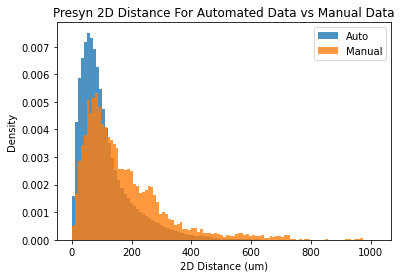

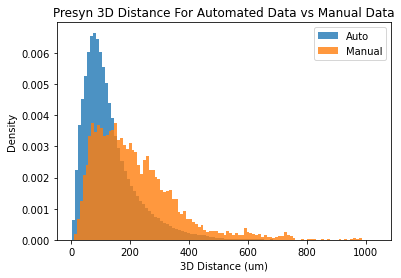

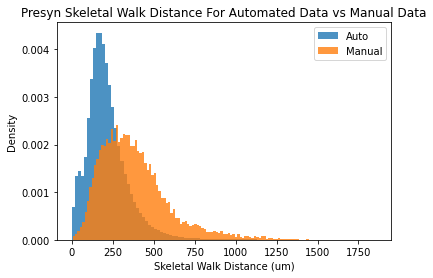

In [138]:
data_string = ["2D Distance","3D Distance","Skeletal Walk Distance"]
data = [distances_2D,distances_3D,skeletal_distances]
data_proof = [distances_2D_proof,distances_3D_proof,skeletal_distances_proof]
n_bins = 100

for d1,d_proof,ds in zip(data,data_proof,data_string): 
    #d,ds = data[0],data_string[0]
    fig,ax = plt.subplots()
    for d,d_name in zip([d1,d_proof],["Auto","Manual"]):
        ax.hist(d,bins=n_bins,label=d_name,density=True,alpha=0.8)
    ax.set_title(f"Presyn {ds} For Automated Data vs Manual Data")
    ax.set_xlabel(f"{ds} (um)")
    ax.set_ylabel(f"Density")
    ax.legend()
    plt.show()

    

In [145]:
minnie.AutoProofreadNeurons3() & "spine_category='densely_spined' AND axon_length>1000 AND n_limbs>8" 

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,proof_version key by which to lookup the decomposition process version,multiplicity the total number of neurons that came from the parent segment id,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_length length (in um) of the classified axon skeleton,axon_area # area (in um^2) of the classified axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,"soma_x x coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_y y coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)","soma_z z coordinate of nucleus centroid in EM voxels (x: 4nm, y: 4nm, z: 40nm)",max_soma_n_faces The largest number of faces of the somas,max_soma_volume The largest volume of the somas the (volume in billions (10*9 nm^3)),n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,run_time the amount of time to run (seconds)
864691134884749562,0,0.25,30.00,0,0,0,3,1,excitatory,densely_spined,1,1,1865.4890556548903,1804.1118699748506,328979,653.85,1,1,209644,135495,26064,35

In [148]:
du.plot_proofread_neuron(segment_id=864691134884789754,split_index=0)

In [149]:
du.plot_proofread_neuron(segment_id=864691135644809967,split_index=0,
                        plot_errored_faces=True)

In [150]:
import classification_utils as clu
import neuron_visualizations as nviz


neuron_obj = (minnie.Decomposition() & dict(segment_id=864691135644809967)).fetch1("decomposition")
clu.axon_classification(neuron_obj)
nviz.plot_axon(neuron_obj)

import system_utils as su
su.compressed_pickle(neuron_obj.axon_skeleton,"864691135644809967_axon_skeleton")

new_axon_skeleton = su.decompress_pickle("864691135644809967_axon_skeleton")

Decompressing Neuron in minimal output mode...please wait


In [161]:
decimation_version = 0
decimation_ratio = 0.25
key_source = ((minnie.Decimation).proj(decimation_version='version') & 
                            "decimation_version=" + str(decimation_version) &
                       f"decimation_ratio={decimation_ratio}" &  (minnie.BaylorSegmentCentroid() & "multiplicity>0")  & (minnie.AllenProofreading() & dict(month=3,day=3,year=2021)).proj())               
minnie.Decomposition() & key_source

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134988608634,0,0.25,30.00,5,0,1,=BLOB=,1150159,2311814,0,1,1,1,2,11,346,233,11067259.173807988,5580597.123682757,15796.577,104.973,104.973,450.146,379.101,4184,0.00037805204832484123,12.092485549132949,6872596.828,156,0.0006087946237372387,26.821,946998934578.9817,136631721.2458318,85567.61161066596,137793.46559669625,6070505990.890908,4574.8436
864691135065024068,0,0.25,30.00,5,0,1,=BLOB=,1683573,3378174,0,2,2,0,1,11,346,101,15448645.134033982,4735340.661534153,28195.927,309.528,279.925,621.111,612.357,4401,0.00028487935102505666,12.719653179190752,12951735.977,254,0.00033980000888030764,17.327,644008505500.065,97079430.94166055,41687.054101675785,49723.72094703834,2535466557.0868697,7567.1259
864691135155711844,0,0.25,30.00,6,0,1,=BLOB=,1323348,2681606,0,2,2,0,1,12,247,99,10335501.970505765,4157038.1039918233,26480.998,386.808,304.693,553.981,502.772,6481,0.0006270619480790302,26.238866396761132,8914214.834,199,0.0007270410373419097,32.568,1301368737143.5571,126957093.46514548,125912.48503045616,145988.0383609293,6539541392.681191,3068.9409
864691135210232512,0,0.25,30.00,6,0,1,=BLOB=,1104606,2279207,0,5,4,2,2,15,374,97,11682255.066969572,3937393.8053746116,18011.375,128.134,128.134,454.419,431.091,2282,0.00019533899807171054,6.101604278074866,7371490.013,204,0.0003095710631060445,11.186,390388762128.02075,108385813.17371431,33417.24349366473,52959.27437187735,1913670402.588337,2271.6559
864691135341057989,0,0.25,30.00,6,0,1,=BLOB=,910711,1829521,0,3,1,2,2,14,259,112,10163119.200359212,4474894.858952958,28470.197,143.696,143.696,469.631,412.785,3107,0.0003057132302344918,11.996138996138995,6203039.418,137,0.0005008834847936154,22.679,557754542849.0073,106585138.54347737,54880.25200268178,89916.3305702223,4071201042.6934843,2310.7131
864691135345291423,0,0.25,30.00,4,0,1,=BLOB=,708043,1432111,0,0,0,0,1,6,249,195,9952249.61378499,7106458.13114

In [162]:
curr_table = (minnie.schema.jobs & "table_name='__decomposition'")
(curr_table)#.delete()

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__decomposition,0e988b84634cec4b9077322ad1512aac,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.131,at-node4,19,203874,2021-03-05 01:06:37
__decomposition,14d2292cca778882cd1343a58676530f,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,203866,2021-03-05 01:12:24
__decomposition,18fad79fc6da95c8e54588d9e7db4027,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.133,at-node6,19,203883,2021-03-05 01:14:38
__decomposition,223292d754d01c10ec97cae17b086998,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.133,at-node6,19,203882,2021-03-05 01:06:57
__decomposition,24c854aeea9a7afd26c48327ed452981,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,203862,2021-03-05 01:13:39
__decomposition,2e0af41fae70ea67ae01dbf37a82ebdf,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.155,at-node28,19,203877,2021-03-05 01:17:50
__decomposition,3756476d71c1ec85d9ce18d0940e8827,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.175,at-node48,19,203872,2021-03-05 01:12:16
__decomposition,3e910899c185a47a485f29c7b99746f1,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.155,at-node28,21,203879,2021-03-05 01:10:11
__decomposition,421d96cd38cb57efc18a96b2210cdbef,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.83,at-compute004,19,203869,2021-03-05 01:13:15
__decomposition,53a4c468ff5743e1e28cc19c0c217247,reserved,=BLOB=,,=BLOB=,celiib@10.28.0.147,at-node20,19,203880,2021-03-05 01:08:21
